# CRLBF Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [3]:
df_crlbf = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/crlbf.csv')
df_crlbf['Date'] = pd.to_datetime(df_crlbf['Date'])
df_crlbf = df_crlbf.set_index('Date')
df_crlbf = df_crlbf.rename(columns={'Open':'crlbf_Open', 'High':'crlbf_High', 'Low':'crlbf_Low', 'Close':'crlbf_Close', 'Volume':'crlbf_Volume'})
df_crlbf = df_crlbf.drop('Adj Close', axis=1)
df_crlbf['crlbf_prev_close'] = df_crlbf['crlbf_Close'].shift(1)
df_crlbf['crlbf_next_close'] = df_crlbf['crlbf_Close'].shift(-1)
df_crlbf['crlbf_diff'] = df_crlbf['crlbf_Close'].diff()
df_crlbf['crlbf_%change'] = df_crlbf['crlbf_Close'].pct_change()
df_crlbf['crlbf_5day_avg_close'] = df_crlbf['crlbf_Close'].rolling(5).mean()
df_crlbf['crlbf_5day_avg_diff'] = df_crlbf['crlbf_diff'].rolling(5).mean()
df_crlbf['crlbf_10day_avg_close'] = df_crlbf['crlbf_Close'].rolling(10).mean()
df_crlbf['crlbf_10day_avg_diff'] = df_crlbf['crlbf_diff'].rolling(10).mean()

In [4]:
df_crlbf

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       5.300       5.520      4.742        4.962        174800   
2018-12-04       5.152       5.165      4.186        4.340        269400   
2018-12-06       5.071       5.145      4.320        4.750        217100   
2018-12-07       5.194       5.420      4.999        5.000        187000   
2018-12-10       5.022       5.338      5.022        5.231        165200   
...                ...         ...        ...          ...           ...   
2022-05-17       3.973       4.100      3.900        3.900        328400   
2022-05-18       3.990       4.070      3.800        3.860        554100   
2022-05-19       3.990       4.030      3.840        3.980        436500   
2022-05-20       3.990       4.200      3.878        4.090        329800   
2022-05-23       4.210       4.220      4.080        4.140        266700   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03               NaN             4.340         NaN            NaN   
2018-12-04             4.962             4.750      -0.622      -0.125353   
2018-12-06             4.340             5.000       0.410       0.094470   
2018-12-07             4.750             5.231       0.250       0.052632   
2018-12-10             5.000             5.380       0.231       0.046200   
...                      ...               ...         ...            ...   
2022-05-17             3.935             3.860      -0.035      -0.008895   
2022-05-18             3.900             3.980      -0.040      -0.010256   
2022-05-19             3.860             4.090       0.120       0.031088   
2022-05-20             3.980             4.140       0.110       0.027638   
2022-05-23             4.090               NaN       0.050       0.012225   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                   NaN                  NaN                    NaN   
2018-12-04                   NaN                  NaN                    NaN   
2018-12-06                   NaN                  NaN                    NaN   
2018-12-07                   NaN                  NaN                    NaN   
2018-12-10                4.8566                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17                3.9214              -0.0400                 4.0430   
2022-05-18                3.8994              -0.0220                 4.0080   
2022-05-19                3.9134               0.0140                 3.9927   
2022-05-20                3.9530               0.0396                 3.9677   
2022-05-23                3.9940               0.0410                 3.9777   

            crlbf_10day_avg_diff  
Date                              
2018-12-03                   NaN  
2018-12-04                   NaN  
2018-12-06                   NaN  
2018-12-07                   NaN  
2018-12-10                   NaN  
...                          ...  
2022-05-17               -0.0390  
2022-05-18               -0.0350  
2022-05-19               -0.0153  
2022-05-20               -0.0250  
2022-05-23                0.0100  

[874 rows x 13 columns]

In [5]:
cut = df_crlbf.index.min()
cut

Timestamp('2018-12-03 00:00:00')

Text(0.5, 0, 'CRLBF Close')

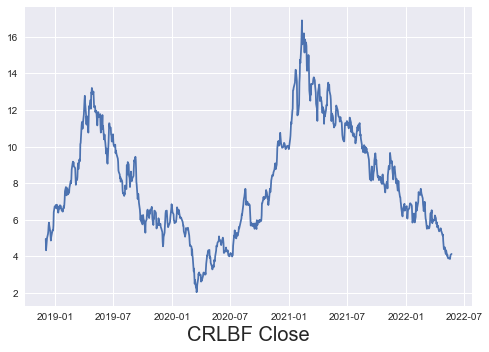

In [6]:
plt.plot(df_crlbf['crlbf_Close'])
plt.xlabel('CRLBF Close', fontsize=20)

## CRLBF and DJIX

In [7]:
df_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_dow.csv')
df_dow['Date'] = pd.to_datetime(df_dow['Date'])
df_dow = df_dow.set_index('Date')
df_dow

djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
1896-05-27      29.39      29.39     29.39       29.39          NaN   
1896-05-28      29.11      29.11     29.11       29.11          NaN   
1896-05-29      29.43      29.43     29.43       29.43          NaN   
1896-06-01      29.40      29.40     29.40       29.40          NaN   
1896-06-02      29.00      29.00     29.00       29.00          NaN   
...               ...        ...       ...         ...          ...   
2022-05-18   32468.67   32468.67  31393.95    31490.07  508465869.0   
2022-05-19   31262.62   31569.13  31016.41    31253.13  554268268.0   
2022-05-20   31426.94   31515.78  30635.76    31261.90  551025623.0   
2022-05-23   31395.89   31968.42  31395.89    31880.24  452693827.0   
2022-05-24   31717.61   32014.86  31365.59    31928.62  428081450.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
1896-05-27              NaN            29.11        NaN           NaN   
1896-05-28            29.39            29.43      -0.28     -0.009527   
1896-05-29            29.11            29.40       0.32      0.010993   
1896-06-01            29.43            29.00      -0.03     -0.001019   
1896-06-02            29.40            28.80      -0.40     -0.013605   
...                     ...              ...        ...           ...   
2022-05-18         32654.59         31253.13   -1164.52     -0.035662   
2022-05-19         31490.07         31261.90    -236.94     -0.007524   
2022-05-20         31253.13         31880.24       8.77      0.000281   
2022-05-23         31261.90         31928.62     618.34      0.019779   
2022-05-24         31880.24              NaN      48.38      0.001518   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
1896-05-27                  NaN                 NaN                   NaN   
1896-05-28                  NaN                 NaN                   NaN   
1896-05-29                  NaN                 NaN                   NaN   
1896-06-01                  NaN                 NaN                   NaN   
1896-06-02               29.266                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-18            32059.008             -68.808             32243.293   
2022-05-19            31963.574             -95.434             32068.809   
2022-05-20            31776.622            -186.952             31905.062   
2022-05-23            31707.986             -68.636             31868.516   
2022-05-24            31562.792            -145.194             31845.304   

            djix_10day_avg_diff  
Date                             
1896-05-27                  NaN  
1896-05-28                  NaN  
1896-05-29                  NaN  
1896-06-01                  NaN  
1896-06-02                  NaN  
...                         ...  
2022-05-18             -257.099  
2022-05-19             -174.484  
2022-05-20             -163.747  
2022-05-23              -36.546  
2022-05-24              -23.212  

[32641 rows x 13 columns]

In [8]:
df0 = pd.merge(df_crlbf, df_dow, on='Date', how='left')
df0

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       5.300       5.520      4.742        4.962        174800   
2018-12-04       5.152       5.165      4.186        4.340        269400   
2018-12-06       5.071       5.145      4.320        4.750        217100   
2018-12-07       5.194       5.420      4.999        5.000        187000   
2018-12-10       5.022       5.338      5.022        5.231        165200   
...                ...         ...        ...          ...           ...   
2022-05-17       3.973       4.100      3.900        3.900        328400   
2022-05-18       3.990       4.070      3.800        3.860        554100   
2022-05-19       3.990       4.030      3.840        3.980        436500   
2022-05-20       3.990       4.200      3.878        4.090        329800   
2022-05-23       4.210       4.220      4.080        4.140        266700   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03               NaN             4.340         NaN            NaN   
2018-12-04             4.962             4.750      -0.622      -0.125353   
2018-12-06             4.340             5.000       0.410       0.094470   
2018-12-07             4.750             5.231       0.250       0.052632   
2018-12-10             5.000             5.380       0.231       0.046200   
...                      ...               ...         ...            ...   
2022-05-17             3.935             3.860      -0.035      -0.008895   
2022-05-18             3.900             3.980      -0.040      -0.010256   
2022-05-19             3.860             4.090       0.120       0.031088   
2022-05-20             3.980             4.140       0.110       0.027638   
2022-05-23             4.090               NaN       0.050       0.012225   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                   NaN                  NaN                    NaN   
2018-12-04                   NaN                  NaN                    NaN   
2018-12-06                   NaN                  NaN                    NaN   
2018-12-07                   NaN                  NaN                    NaN   
2018-12-10                4.8566                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17                3.9214              -0.0400                 4.0430   
2022-05-18                3.8994              -0.0220                 4.0080   
2022-05-19                3.9134               0.0140                 3.9927   
2022-05-20                3.9530               0.0396                 3.9677   
2022-05-23                3.9940               0.0410                 3.9777   

            crlbf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-12-03                   NaN   25779.57   25980.21  25670.51    25826.43   
2018-12-04                   NaN   25752.56   25773.12  25008.11    25027.07   
2018-12-06                   NaN   24737.42   24951.01  24242.22    24947.67   
2018-12-07                   NaN   24918.82   25095.62  24284.78    24388.95   
2018-12-10                   NaN   24360.95   24500.81  23881.37    24423.26   
...                          ...        ...        ...       ...         ...   
2022-05-17               -0.0390   32427.00   32689.14  32308.15    32654.59   
2022-05-18               -0.0350   32468.67   32468.67  31393.95    31490.07   
2022-05-19               -0.0153   31262.62   31569.13  31016.41    31253.13   
2022-05-20               -0.0250   31426.94   31515.78  30635.76    31261.90   
2022-05-23          

In [9]:
df_isna0 = df0.isna()
df_isna0

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       False       False      False        False         False   
2018-12-04       False       False      False        False         False   
2018-12-06       False       False      False        False         False   
2018-12-07       False       False      False        False         False   
2018-12-10       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-17       False       False      False        False         False   
2022-05-18       False       False      False        False         False   
2022-05-19       False       False      False        False         False   
2022-05-20       False       False      False        False         False   
2022-05-23       False       False      False        False         False   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03              True             False        True           True   
2018-12-04             False             False       False          False   
2018-12-06             False             False       False          False   
2018-12-07             False             False       False          False   
2018-12-10             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-17             False             False       False          False   
2022-05-18             False             False       False          False   
2022-05-19             False             False       False          False   
2022-05-20             False             False       False          False   
2022-05-23             False              True       False          False   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                  True                 True                   True   
2018-12-04                  True                 True                   True   
2018-12-06                  True                 True                   True   
2018-12-07                  True                 True                   True   
2018-12-10                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-17                 False                False                  False   
2022-05-18                 False                False                  False   
2022-05-19                 False                False                  False   
2022-05-20                 False                False                  False   
2022-05-23                 False                False                  False   

            crlbf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-12-03                  True      False      False     False       False   
2018-12-04                  True      False      False     False       False   
2018-12-06                  True      False      False     False       False   
2018-12-07                  True      False      False     False       False   
2018-12-10                  True      False      False     False       False   
...                          ...        ...        ...       ...         ...   
2022-05-17                 False      False      False     False       False   
2022-05-18                 False      False      False     False       False   
2022-05-19                 False      False      False     False       False   
2022-05-20                 False      False      False     False       False   
2022-05-23          

In [10]:
df_isna0 = df_isna0.add_suffix('_b')

In [11]:
df0 = df0.fillna(0)
df0.head()

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       5.300       5.520      4.742        4.962        174800   
2018-12-04       5.152       5.165      4.186        4.340        269400   
2018-12-06       5.071       5.145      4.320        4.750        217100   
2018-12-07       5.194       5.420      4.999        5.000        187000   
2018-12-10       5.022       5.338      5.022        5.231        165200   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03             0.000             4.340       0.000       0.000000   
2018-12-04             4.962             4.750      -0.622      -0.125353   
2018-12-06             4.340             5.000       0.410       0.094470   
2018-12-07             4.750             5.231       0.250       0.052632   
2018-12-10             5.000             5.380       0.231       0.046200   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                0.0000                  0.0                    0.0   
2018-12-04                0.0000                  0.0                    0.0   
2018-12-06                0.0000                  0.0                    0.0   
2018-12-07                0.0000                  0.0                    0.0   
2018-12-10                4.8566                  0.0                    0.0   

            crlbf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-12-03                   0.0   25779.57   25980.21  25670.51    25826.43   
2018-12-04                   0.0   25752.56   25773.12  25008.11    25027.07   
2018-12-06                   0.0   24737.42   24951.01  24242.22    24947.67   
2018-12-07                   0.0   24918.82   25095.62  24284.78    24388.95   
2018-12-10                   0.0   24360.95   24500.81  23881.37    24423.26   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2018-12-03  388505418.0         25538.46         25027.07     287.97   
2018-12-04  418984696.0         25826.43         24947.67    -799.36   
2018-12-06  471673514.0         25027.07         24388.95     -79.40   
2018-12-07  398190611.0         24947.67         24423.26    -558.72   
2018-12-10  389679536.0         24388.95         24370.24      34.31   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2018-12-03      0.011276            25363.778             237.238   
2018-12-04     -0.030951            25419.446              55.668   
2018-12-06     -0.003173            25335.694             -83.752   
2018-12-07     -0.022396            25145.716            -189.978   
2018-12-10      0.001407            24922.676            -223.040   

            djix_10day_avg_close  djix_10day_avg_diff  
Date                                                   
2018-12-03             24969.285               41.321  
2018-12-04             24970.248                0.963  
2018-12-06             25018.451               48.203  
2018-12-07             25010.877               -7.574  
2018-12-10             25024.608               13.731

In [12]:
df0 = pd.concat([df0, df_isna0], axis=1)
df0

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       5.300       5.520      4.742        4.962        174800   
2018-12-04       5.152       5.165      4.186        4.340        269400   
2018-12-06       5.071       5.145      4.320        4.750        217100   
2018-12-07       5.194       5.420      4.999        5.000        187000   
2018-12-10       5.022       5.338      5.022        5.231        165200   
...                ...         ...        ...          ...           ...   
2022-05-17       3.973       4.100      3.900        3.900        328400   
2022-05-18       3.990       4.070      3.800        3.860        554100   
2022-05-19       3.990       4.030      3.840        3.980        436500   
2022-05-20       3.990       4.200      3.878        4.090        329800   
2022-05-23       4.210       4.220      4.080        4.140        266700   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03             0.000             4.340       0.000       0.000000   
2018-12-04             4.962             4.750      -0.622      -0.125353   
2018-12-06             4.340             5.000       0.410       0.094470   
2018-12-07             4.750             5.231       0.250       0.052632   
2018-12-10             5.000             5.380       0.231       0.046200   
...                      ...               ...         ...            ...   
2022-05-17             3.935             3.860      -0.035      -0.008895   
2022-05-18             3.900             3.980      -0.040      -0.010256   
2022-05-19             3.860             4.090       0.120       0.031088   
2022-05-20             3.980             4.140       0.110       0.027638   
2022-05-23             4.090             0.000       0.050       0.012225   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                0.0000               0.0000                 0.0000   
2018-12-04                0.0000               0.0000                 0.0000   
2018-12-06                0.0000               0.0000                 0.0000   
2018-12-07                0.0000               0.0000                 0.0000   
2018-12-10                4.8566               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-17                3.9214              -0.0400                 4.0430   
2022-05-18                3.8994              -0.0220                 4.0080   
2022-05-19                3.9134               0.0140                 3.9927   
2022-05-20                3.9530               0.0396                 3.9677   
2022-05-23                3.9940               0.0410                 3.9777   

            crlbf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-12-03                0.0000   25779.57   25980.21  25670.51    25826.43   
2018-12-04                0.0000   25752.56   25773.12  25008.11    25027.07   
2018-12-06                0.0000   24737.42   24951.01  24242.22    24947.67   
2018-12-07                0.0000   24918.82   25095.62  24284.78    24388.95   
2018-12-10                0.0000   24360.95   24500.81  23881.37    24423.26   
...                          ...        ...        ...       ...         ...   
2022-05-17               -0.0390   32427.00   32689.14  32308.15    32654.59   
2022-05-18               -0.0350   32468.67   32468.67  31393.95    31490.07   
2022-05-19               -0.0153   31262.62   31569.13  31016.41    31253.13   
2022-05-20               -0.0250   31426.94   31515.78  30635.76    31261.90   
2022-05-23          

In [13]:
df0['month'] = df0.index.month
df0['day'] = df0.index.day
df0['year'] = df0.index.year
df0['quarter'] = (df0['month']-1)//3 + 1

In [14]:
cols = df0.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'crlbf_Open']

In [15]:
df0 = df0[cols].copy()
df0.head()

month  day  year  quarter  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                       
2018-12-03     12    3  2018        4       5.300       5.520      4.742   
2018-12-04     12    4  2018        4       5.152       5.165      4.186   
2018-12-06     12    6  2018        4       5.071       5.145      4.320   
2018-12-07     12    7  2018        4       5.194       5.420      4.999   
2018-12-10     12   10  2018        4       5.022       5.338      5.022   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2018-12-03        4.962        174800             0.000             4.340   
2018-12-04        4.340        269400             4.962             4.750   
2018-12-06        4.750        217100             4.340             5.000   
2018-12-07        5.000        187000             4.750             5.231   
2018-12-10        5.231        165200             5.000             5.380   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2018-12-03       0.000       0.000000                0.0000   
2018-12-04      -0.622      -0.125353                0.0000   
2018-12-06       0.410       0.094470                0.0000   
2018-12-07       0.250       0.052632                0.0000   
2018-12-10       0.231       0.046200                4.8566   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-12-03                  0.0                    0.0                   0.0   
2018-12-04                  0.0                    0.0                   0.0   
2018-12-06                  0.0                    0.0                   0.0   
2018-12-07                  0.0                    0.0                   0.0   
2018-12-10                  0.0                    0.0                   0.0   

            djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
2018-12-03   25779.57   25980.21  25670.51    25826.43  388505418.0   
2018-12-04   25752.56   25773.12  25008.11    25027.07  418984696.0   
2018-12-06   24737.42   24951.01  24242.22    24947.67  471673514.0   
2018-12-07   24918.82   25095.62  24284.78    24388.95  398190611.0   
2018-12-10   24360.95   24500.81  23881.37    24423.26  389679536.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
2018-12-03         25538.46         25027.07     287.97      0.011276   
2018-12-04         25826.43         24947.67    -799.36     -0.030951   
2018-12-06         25027.07         24388.95     -79.40     -0.003173   
2018-12-07         24947.67         24423.26    -558.72     -0.022396   
2018-12-10         24388.95         24370.24      34.31      0.001407   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
2018-12-03            25363.778             237.238             24969.285   
2018-12-04            25419.446              55.668             24970.248   
2018-12-06            25335.694             -83.752             25018.451   
2018-12-07            25145.716            -189.978             25010.877   
2018-12-10            24922.676            -223.040             25024.608   

            djix_10day_avg_diff  crlbf_Open_b  crlbf_High_b  crlbf_Low_b  \
Date                                                                       
2018-12-03               41.321         False         False        False   
2018-12-04                0.963         False         False        False   
2018-12-06               48.203         False         False        False   
2018-1

In [16]:
df0.drop(df0.tail(1).index, inplace=True)

In [17]:
df0.shape

(873, 56)

In [18]:
n = int(len(df0) * 0.9)
n

785

In [19]:
train0 = df0[:n]
test0 = df0[n:]

In [20]:
print(len(train0))
print(len(test0))

785
88


In [21]:
X_train0 = train0.drop('crlbf_next_close', axis=1)
X_train0.head(3)

month  day  year  quarter  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                       
2018-12-03     12    3  2018        4       5.300       5.520      4.742   
2018-12-04     12    4  2018        4       5.152       5.165      4.186   
2018-12-06     12    6  2018        4       5.071       5.145      4.320   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_diff  \
Date                                                                  
2018-12-03        4.962        174800             0.000       0.000   
2018-12-04        4.340        269400             4.962      -0.622   
2018-12-06        4.750        217100             4.340       0.410   

            crlbf_%change  crlbf_5day_avg_close  crlbf_5day_avg_diff  \
Date                                                                   
2018-12-03       0.000000                   0.0                  0.0   
2018-12-04      -0.125353                   0.0                  0.0   
2018-12-06       0.094470                   0.0                  0.0   

            crlbf_10day_avg_close  crlbf_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2018-12-03                    0.0                   0.0   25779.57   25980.21   
2018-12-04                    0.0                   0.0   25752.56   25773.12   
2018-12-06                    0.0                   0.0   24737.42   24951.01   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2018-12-03  25670.51    25826.43  388505418.0         25538.46   
2018-12-04  25008.11    25027.07  418984696.0         25826.43   
2018-12-06  24242.22    24947.67  471673514.0         25027.07   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2018-12-03         25027.07     287.97      0.011276            25363.778   
2018-12-04         24947.67    -799.36     -0.030951            25419.446   
2018-12-06         24388.95     -79.40     -0.003173            25335.694   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2018-12-03             237.238             24969.285               41.321   
2018-12-04              55.668             24970.248                0.963   
2018-12-06             -83.752             25018.451               48.203   

            crlbf_Open_b  crlbf_High_b  crlbf_Low_b  crlbf_Close_b  \
Date                                                                 
2018-12-03         False         False        False          False   
2018-12-04         False         False        False          False   
2018-12-06         False         False        False          False   

            crlbf_Volume_b  crlbf_prev_close_b  crlbf_next_close_b  \
Date                                                                 
2018-12-03           False                True               False   
2018-12-04           False               False               False   
2018-12-06           False               False               False   

            crlbf_diff_b  crlbf_%change_b  crlbf_5day_avg_close_b  \
Date                                                                
2018-12-03          True             True                    True   
2018-12-04         False            False                    True   
2018-12-06         False            False                    True   

            crlbf_5day_avg_diff_b  crlbf_10day_avg_close_b  \
Date                                                         
2018-12-03                   True                     True   
2018-12-04                   True                     True   
2018-12-06                   True                     True   

            crlbf_10day_avg_diff_b  djix_Open_

In [22]:
X_train0.shape

(785, 55)

In [23]:
y_train0 = train0['crlbf_next_close']
y_train0.head(3)

Date
2018-12-03    4.34
2018-12-04    4.75
2018-12-06    5.00
Name: crlbf_next_close, dtype: float64

In [24]:
y_train0.tail(3)

Date
2022-01-11    6.767
2022-01-12    6.880
2022-01-13    6.910
Name: crlbf_next_close, dtype: float64

In [25]:
X_test0 = test0.drop('crlbf_next_close', axis=1)
y_test0 = test0['crlbf_next_close']

In [26]:
X_test0.head(3)

month  day  year  quarter  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                       
2022-01-14      1   14  2022        1        6.80        6.98       6.61   
2022-01-18      1   18  2022        1        6.53        6.92       6.50   
2022-01-19      1   19  2022        1        6.90        6.90       6.44   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_diff  \
Date                                                                  
2022-01-14        6.910        418000             6.880       0.030   
2022-01-18        6.818        502100             6.910      -0.092   
2022-01-19        6.760        658100             6.818      -0.058   

            crlbf_%change  crlbf_5day_avg_close  crlbf_5day_avg_diff  \
Date                                                                   
2022-01-14       0.004360                6.7614               0.0760   
2022-01-18      -0.013314                6.8030               0.0416   
2022-01-19      -0.008507                6.8270               0.0240   

            crlbf_10day_avg_close  crlbf_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2022-01-14                 6.6027                0.0240   35996.43   35996.43   
2022-01-18                 6.6095                0.0068   35661.76   35661.76   
2022-01-19                 6.6305                0.0210   35412.30   35547.83   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2022-01-14  35641.49    35911.81  439707231.0         36113.62   
2022-01-18  35262.02    35368.47  490284707.0         35911.81   
2022-01-19  35015.49    35028.65  443735245.0         35368.47   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2022-01-14         35368.47    -201.81     -0.005588            36127.328   
2022-01-18         35028.65    -543.34     -0.015130            35987.248   
2022-01-19         34715.39    -339.82     -0.009608            35742.574   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2022-01-14             -63.970             36289.659              -42.649   
2022-01-18            -140.080             36168.000             -121.659   
2022-01-19            -244.674             35990.900             -177.100   

            crlbf_Open_b  crlbf_High_b  crlbf_Low_b  crlbf_Close_b  \
Date                                                                 
2022-01-14         False         False        False          False   
2022-01-18         False         False        False          False   
2022-01-19         False         False        False          False   

            crlbf_Volume_b  crlbf_prev_close_b  crlbf_next_close_b  \
Date                                                                 
2022-01-14           False               False               False   
2022-01-18           False               False               False   
2022-01-19           False               False               False   

            crlbf_diff_b  crlbf_%change_b  crlbf_5day_avg_close_b  \
Date                                                                
2022-01-14         False            False                   False   
2022-01-18         False            False                   False   
2022-01-19         False            False                   False   

            crlbf_5day_avg_diff_b  crlbf_10day_avg_close_b  \
Date                                                         
2022-01-14                  False                    False   
2022-01-18                  False                    False   
2022-01-19                  False                    False   

            crlbf_10day_avg_diff_b  djix_Open_

In [27]:
X_test0.shape

(88, 55)

In [28]:
y_test0.tail(3)

Date
2022-05-18    3.98
2022-05-19    4.09
2022-05-20    4.14
Name: crlbf_next_close, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

In [30]:
model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_test0)

In [31]:
y_pred0[:5]

array([6.71076505, 6.6715128 , 6.60849714, 6.09133887, 5.84656127])

In [32]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man0 = rmse_manual(y_test0, y_pred0)
print(rmse_man0)

0.2153390063717566


In [33]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man0 = mae_manual(y_test0, y_pred0)
print(mae_man0)

0.17752671378862495


In [34]:
y_train0 = pd.DataFrame(y_train0, columns=['crlbf_next_close'])
y_test0 = pd.DataFrame(y_test0, columns=['crlbf_next_close'])

In [35]:
y_test0['crlbf_pred_next_close'] = y_pred0

In [36]:
y_test0.tail()

crlbf_next_close  crlbf_pred_next_close
Date                                               
2022-05-16              3.90               4.039564
2022-05-17              3.86               3.649806
2022-05-18              3.98               3.755987
2022-05-19              4.09               4.000789
2022-05-20              4.14               4.274582

In [37]:
hyper_table.append(dict(stock='crlbf', 
                        version='1+Dow',
                        model=model0, 
                        rmse=rmse_man0,
                        mae=mae_man0,
                        actual_price=y_test0['crlbf_next_close'][-1],
                        predicted_price=y_test0['crlbf_pred_next_close'][-1],
                        rows=df0.shape[0], 
                        train_rows=X_train0.shape[0],
                        test_rows=X_test0.shape[0],
                        columns=df0.shape[1]))

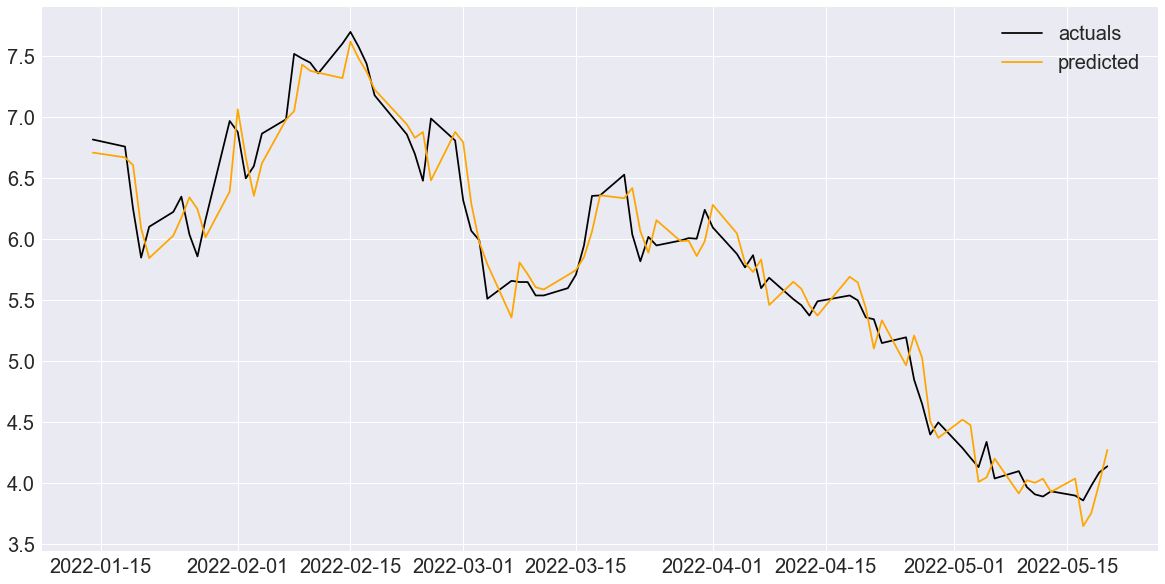

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test0['crlbf_next_close'], color='black')
ax.plot(y_test0['crlbf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## CRLBF and Cannabis ETFs

In [39]:
df_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs.csv')
df_etfs['Date'] = pd.to_datetime(df_etfs['Date'])
df_etfs = df_etfs.set_index('Date')

In [40]:
df1 = pd.merge(df_crlbf, df_etfs, on='Date', how='left')
df1

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       5.300       5.520      4.742        4.962        174800   
2018-12-04       5.152       5.165      4.186        4.340        269400   
2018-12-06       5.071       5.145      4.320        4.750        217100   
2018-12-07       5.194       5.420      4.999        5.000        187000   
2018-12-10       5.022       5.338      5.022        5.231        165200   
...                ...         ...        ...          ...           ...   
2022-05-17       3.973       4.100      3.900        3.900        328400   
2022-05-18       3.990       4.070      3.800        3.860        554100   
2022-05-19       3.990       4.030      3.840        3.980        436500   
2022-05-20       3.990       4.200      3.878        4.090        329800   
2022-05-23       4.210       4.220      4.080        4.140        266700   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03               NaN             4.340         NaN            NaN   
2018-12-04             4.962             4.750      -0.622      -0.125353   
2018-12-06             4.340             5.000       0.410       0.094470   
2018-12-07             4.750             5.231       0.250       0.052632   
2018-12-10             5.000             5.380       0.231       0.046200   
...                      ...               ...         ...            ...   
2022-05-17             3.935             3.860      -0.035      -0.008895   
2022-05-18             3.900             3.980      -0.040      -0.010256   
2022-05-19             3.860             4.090       0.120       0.031088   
2022-05-20             3.980             4.140       0.110       0.027638   
2022-05-23             4.090               NaN       0.050       0.012225   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                   NaN                  NaN                    NaN   
2018-12-04                   NaN                  NaN                    NaN   
2018-12-06                   NaN                  NaN                    NaN   
2018-12-07                   NaN                  NaN                    NaN   
2018-12-10                4.8566                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17                3.9214              -0.0400                 4.0430   
2022-05-18                3.8994              -0.0220                 4.0080   
2022-05-19                3.9134               0.0140                 3.9927   
2022-05-20                3.9530               0.0396                 3.9677   
2022-05-23                3.9940               0.0410                 3.9777   

            crlbf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-12-03                   NaN  29.850000  30.837999  28.350000  29.100000   
2018-12-04                   NaN  29.200001  29.410000  28.000000  28.100000   
2018-12-06                   NaN  26.400000  27.760000  26.100000  27.549999   
2018-12-07                   NaN  29.900000  29.900000  28.590000  28.920000   
2018-12-10                   NaN  28.920000  29.430000  27.889999  28.600000   
...                          ...        ...        ...        ...        ...   
2022-05-17               -0.0390   7.990000   8.170000   7.880000   8.100000   
2022-05-18               -0.0350   7.940000   8.030000   7.605000   7.620000   
2022-05-19               -0.0153   7.560000   7.860000   7.540000   7.780000   
2022-05-20               -0.0250   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [41]:
df_isna1 = df1.isna()
df_isna1

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       False       False      False        False         False   
2018-12-04       False       False      False        False         False   
2018-12-06       False       False      False        False         False   
2018-12-07       False       False      False        False         False   
2018-12-10       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-17       False       False      False        False         False   
2022-05-18       False       False      False        False         False   
2022-05-19       False       False      False        False         False   
2022-05-20       False       False      False        False         False   
2022-05-23       False       False      False        False         False   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03              True             False        True           True   
2018-12-04             False             False       False          False   
2018-12-06             False             False       False          False   
2018-12-07             False             False       False          False   
2018-12-10             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-17             False             False       False          False   
2022-05-18             False             False       False          False   
2022-05-19             False             False       False          False   
2022-05-20             False             False       False          False   
2022-05-23             False              True       False          False   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                  True                 True                   True   
2018-12-04                  True                 True                   True   
2018-12-06                  True                 True                   True   
2018-12-07                  True                 True                   True   
2018-12-10                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-17                 False                False                  False   
2022-05-18                 False                False                  False   
2022-05-19                 False                False                  False   
2022-05-20                 False                False                  False   
2022-05-23                 False                False                  False   

            crlbf_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2018-12-03                  True    False    False   False     False   
2018-12-04                  True    False    False   False     False   
2018-12-06                  True    False    False   False     False   
2018-12-07                  True    False    False   False     False   
2018-12-10                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-17                 False    False    False   False     False   
2022-05-18                 False    False    False   False     False   
2022-05-19                 False    False    False   False     False   
2022-05-20                 False    False    False   False     False   
2022-05-23                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [42]:
df_isna1 = df_isna1.add_suffix('_b')

In [43]:
df1 = df1.fillna(0)
df1.head()

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       5.300       5.520      4.742        4.962        174800   
2018-12-04       5.152       5.165      4.186        4.340        269400   
2018-12-06       5.071       5.145      4.320        4.750        217100   
2018-12-07       5.194       5.420      4.999        5.000        187000   
2018-12-10       5.022       5.338      5.022        5.231        165200   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03             0.000             4.340       0.000       0.000000   
2018-12-04             4.962             4.750      -0.622      -0.125353   
2018-12-06             4.340             5.000       0.410       0.094470   
2018-12-07             4.750             5.231       0.250       0.052632   
2018-12-10             5.000             5.380       0.231       0.046200   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                0.0000                  0.0                    0.0   
2018-12-04                0.0000                  0.0                    0.0   
2018-12-06                0.0000                  0.0                    0.0   
2018-12-07                0.0000                  0.0                    0.0   
2018-12-10                4.8566                  0.0                    0.0   

            crlbf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-12-03                   0.0  29.850000  30.837999  28.350000  29.100000   
2018-12-04                   0.0  29.200001  29.410000  28.000000  28.100000   
2018-12-06                   0.0  26.400000  27.760000  26.100000  27.549999   
2018-12-07                   0.0  29.900000  29.900000  28.590000  28.920000   
2018-12-10                   0.0  28.920000  29.430000  27.889999  28.600000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-12-03    2254500      29.360001      28.100000 -0.260001   -0.008856   
2018-12-04     628100      29.100000      27.549999 -1.000000   -0.034364   
2018-12-06     921100      28.100000      28.920000 -0.550001   -0.019573   
2018-12-07     964000      27.549999      28.600000  1.370001    0.049728   
2018-12-10     745900      28.920000      29.080000 -0.320000   -0.011065   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-12-03             29.234             0.018              29.333   
2018-12-04             29.124            -0.110              29.193   
2018-12-06             28.680            -0.444              29.058   
2018-12-07             28.606            -0.074              28.980   
2018-12-10             28.454            -0.152              28.835   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-12-03             -0.154        0.0        0.0       0.0         0.0   
2018-12-04             -0.140        0.0        0.0       0.0         0.0   
2018-12-06             -0.135        0.0        0.0       0.0         0.0   
2018-12-07             -0.078        0.0        0.0       0.0         0.0   
2018-12-10             -0.145        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-12-03          0.0              0.0              0.0        0.0   
2018-12-04          0.0

In [44]:
df1 = pd.concat([df1, df_isna1], axis=1)
df1

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       5.300       5.520      4.742        4.962        174800   
2018-12-04       5.152       5.165      4.186        4.340        269400   
2018-12-06       5.071       5.145      4.320        4.750        217100   
2018-12-07       5.194       5.420      4.999        5.000        187000   
2018-12-10       5.022       5.338      5.022        5.231        165200   
...                ...         ...        ...          ...           ...   
2022-05-17       3.973       4.100      3.900        3.900        328400   
2022-05-18       3.990       4.070      3.800        3.860        554100   
2022-05-19       3.990       4.030      3.840        3.980        436500   
2022-05-20       3.990       4.200      3.878        4.090        329800   
2022-05-23       4.210       4.220      4.080        4.140        266700   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03             0.000             4.340       0.000       0.000000   
2018-12-04             4.962             4.750      -0.622      -0.125353   
2018-12-06             4.340             5.000       0.410       0.094470   
2018-12-07             4.750             5.231       0.250       0.052632   
2018-12-10             5.000             5.380       0.231       0.046200   
...                      ...               ...         ...            ...   
2022-05-17             3.935             3.860      -0.035      -0.008895   
2022-05-18             3.900             3.980      -0.040      -0.010256   
2022-05-19             3.860             4.090       0.120       0.031088   
2022-05-20             3.980             4.140       0.110       0.027638   
2022-05-23             4.090             0.000       0.050       0.012225   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                0.0000               0.0000                 0.0000   
2018-12-04                0.0000               0.0000                 0.0000   
2018-12-06                0.0000               0.0000                 0.0000   
2018-12-07                0.0000               0.0000                 0.0000   
2018-12-10                4.8566               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-17                3.9214              -0.0400                 4.0430   
2022-05-18                3.8994              -0.0220                 4.0080   
2022-05-19                3.9134               0.0140                 3.9927   
2022-05-20                3.9530               0.0396                 3.9677   
2022-05-23                3.9940               0.0410                 3.9777   

            crlbf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-12-03                0.0000  29.850000  30.837999  28.350000  29.100000   
2018-12-04                0.0000  29.200001  29.410000  28.000000  28.100000   
2018-12-06                0.0000  26.400000  27.760000  26.100000  27.549999   
2018-12-07                0.0000  29.900000  29.900000  28.590000  28.920000   
2018-12-10                0.0000  28.920000  29.430000  27.889999  28.600000   
...                          ...        ...        ...        ...        ...   
2022-05-17               -0.0390   7.990000   8.170000   7.880000   8.100000   
2022-05-18               -0.0350   7.940000   8.030000   7.605000   7.620000   
2022-05-19               -0.0153   7.560000   7.860000   7.540000   7.780000   
2022-05-20               -0.0250   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [45]:
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['year'] = df1.index.year
df1['quarter'] = (df1['month']-1)//3 + 1

In [46]:
cols = df1.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'crlbf_Open']

In [47]:
df1 = df1[cols].copy()
df1

month  day  year  quarter  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                       
2018-12-03     12    3  2018        4       5.300       5.520      4.742   
2018-12-04     12    4  2018        4       5.152       5.165      4.186   
2018-12-06     12    6  2018        4       5.071       5.145      4.320   
2018-12-07     12    7  2018        4       5.194       5.420      4.999   
2018-12-10     12   10  2018        4       5.022       5.338      5.022   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-17      5   17  2022        2       3.973       4.100      3.900   
2022-05-18      5   18  2022        2       3.990       4.070      3.800   
2022-05-19      5   19  2022        2       3.990       4.030      3.840   
2022-05-20      5   20  2022        2       3.990       4.200      3.878   
2022-05-23      5   23  2022        2       4.210       4.220      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2018-12-03        4.962        174800             0.000             4.340   
2018-12-04        4.340        269400             4.962             4.750   
2018-12-06        4.750        217100             4.340             5.000   
2018-12-07        5.000        187000             4.750             5.231   
2018-12-10        5.231        165200             5.000             5.380   
...                 ...           ...               ...               ...   
2022-05-17        3.900        328400             3.935             3.860   
2022-05-18        3.860        554100             3.900             3.980   
2022-05-19        3.980        436500             3.860             4.090   
2022-05-20        4.090        329800             3.980             4.140   
2022-05-23        4.140        266700             4.090             0.000   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2018-12-03       0.000       0.000000                0.0000   
2018-12-04      -0.622      -0.125353                0.0000   
2018-12-06       0.410       0.094470                0.0000   
2018-12-07       0.250       0.052632                0.0000   
2018-12-10       0.231       0.046200                4.8566   
...                ...            ...                   ...   
2022-05-17      -0.035      -0.008895                3.9214   
2022-05-18      -0.040      -0.010256                3.8994   
2022-05-19       0.120       0.031088                3.9134   
2022-05-20       0.110       0.027638                3.9530   
2022-05-23       0.050       0.012225                3.9940   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-12-03               0.0000                 0.0000                0.0000   
2018-12-04               0.0000                 0.0000                0.0000   
2018-12-06               0.0000                 0.0000                0.0000   
2018-12-07               0.0000                 0.0000                0.0000   
2018-12-10               0.0000                 0.0000                0.0000   
...                         ...                    ...                   ...   
2022-05-17              -0.0400                 4.0430               -0.0390   
2022-05-18              -0.0220                 4.0080               -0.0350   
2022-05-19               0.0140                 3.9927               -0.0153   
2022-05-20               0.0396                 3.9677               -0.0250   
2022-05-23               0.0410                 3.9777                0.0100   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2018-12-03  29.850000 

In [48]:
df1.drop(df1.tail(1).index, inplace=True)

In [49]:
n = int(len(df1) * 0.9)
n

785

In [50]:
train1 = df1[:n]
test1 = df1[n:]

In [51]:
print(len(train1))
print(len(test1))

785
88


In [52]:
X_train1 = train1.drop('crlbf_next_close', axis=1)
X_train1.head(3)

month  day  year  quarter  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                       
2018-12-03     12    3  2018        4       5.300       5.520      4.742   
2018-12-04     12    4  2018        4       5.152       5.165      4.186   
2018-12-06     12    6  2018        4       5.071       5.145      4.320   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_diff  \
Date                                                                  
2018-12-03        4.962        174800             0.000       0.000   
2018-12-04        4.340        269400             4.962      -0.622   
2018-12-06        4.750        217100             4.340       0.410   

            crlbf_%change  crlbf_5day_avg_close  crlbf_5day_avg_diff  \
Date                                                                   
2018-12-03       0.000000                   0.0                  0.0   
2018-12-04      -0.125353                   0.0                  0.0   
2018-12-06       0.094470                   0.0                  0.0   

            crlbf_10day_avg_close  crlbf_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2018-12-03                    0.0                   0.0  29.850000  30.837999   
2018-12-04                    0.0                   0.0  29.200001  29.410000   
2018-12-06                    0.0                   0.0  26.400000  27.760000   

            mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                     
2018-12-03   28.35  29.100000    2254500      29.360001      28.100000   
2018-12-04   28.00  28.100000     628100      29.100000      27.549999   
2018-12-06   26.10  27.549999     921100      28.100000      28.920000   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2018-12-03 -0.260001   -0.008856             29.234             0.018   
2018-12-04 -1.000000   -0.034364             29.124            -0.110   
2018-12-06 -0.550001   -0.019573             28.680            -0.444   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2018-12-03              29.333             -0.154        0.0        0.0   
2018-12-04              29.193             -0.140        0.0        0.0   
2018-12-06              29.058             -0.135        0.0        0.0   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2018-12-03       0.0         0.0          0.0              0.0   
2018-12-04       0.0         0.0          0.0              0.0   
2018-12-06       0.0         0.0          0.0              0.0   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2018-12-03              0.0        0.0           0.0                  0.0   
2018-12-04              0.0        0.0           0.0                  0.0   
2018-12-06              0.0        0.0           0.0                  0.0   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2018-12-03                 0.0                   0.0                  0.0   
2018-12-04                 0.0                   0.0                  0.0   
2018-12-06                 0.0                   0.0                  0.0   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2018-12-03        0.0        0.0       0.0         0.0          0.0   
2018-12-04        0.0        0.0       0.0         0.0          0.0   
2018-12-

In [53]:
X_train1.shape

(785, 159)

In [54]:
y_train1 = train1['crlbf_next_close']
y_train1.head(3)

Date
2018-12-03    4.34
2018-12-04    4.75
2018-12-06    5.00
Name: crlbf_next_close, dtype: float64

In [55]:
y_train1.tail(3)

Date
2022-01-11    6.767
2022-01-12    6.880
2022-01-13    6.910
Name: crlbf_next_close, dtype: float64

In [56]:
X_test1 = test1.drop('crlbf_next_close', axis=1)
y_test1 = test1['crlbf_next_close']

In [57]:
X_test1.head(3)

month  day  year  quarter  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                       
2022-01-14      1   14  2022        1        6.80        6.98       6.61   
2022-01-18      1   18  2022        1        6.53        6.92       6.50   
2022-01-19      1   19  2022        1        6.90        6.90       6.44   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_diff  \
Date                                                                  
2022-01-14        6.910        418000             6.880       0.030   
2022-01-18        6.818        502100             6.910      -0.092   
2022-01-19        6.760        658100             6.818      -0.058   

            crlbf_%change  crlbf_5day_avg_close  crlbf_5day_avg_diff  \
Date                                                                   
2022-01-14       0.004360                6.7614               0.0760   
2022-01-18      -0.013314                6.8030               0.0416   
2022-01-19      -0.008507                6.8270               0.0240   

            crlbf_10day_avg_close  crlbf_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2022-01-14                 6.6027                0.0240    10.83   10.905   
2022-01-18                 6.6095                0.0068    10.71   10.810   
2022-01-19                 6.6305                0.0210    10.55   10.630   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2022-01-14   10.65     10.85     865400          10.85          10.44   
2022-01-18   10.44     10.44     918300          10.85          10.27   
2022-01-19   10.26     10.27    1095300          10.44          10.12   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2022-01-14     0.00    0.000000             11.048            -0.004   
2022-01-18    -0.41   -0.037788             10.922            -0.126   
2022-01-19    -0.17   -0.016284             10.714            -0.208   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2022-01-14              11.028             -0.023  24.219999  24.389999   
2022-01-18              10.929             -0.099  24.450001  24.510000   
2022-01-19              10.827             -0.102  24.379999  24.379999   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2022-01-14  23.820000   24.340000     710800.0        24.559999   
2022-01-18  23.950001   24.030001    1163200.0        24.340000   
2022-01-19  23.065001   23.520000    1591900.0        24.030001   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2022-01-14        24.030001  -0.219999     -0.008958               24.564   
2022-01-18        23.520000  -0.309999     -0.012736               24.484   
2022-01-19        22.350000  -0.510001     -0.021224               24.248   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2022-01-14              -0.022                24.511               -0.125   
2022-01-18              -0.080                24.335               -0.176   
2022-01-19              -0.236                24.209               -0.126   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2022-01-14      11.77      12.00     11.65       11.87     141700.0   
2022-01-18      11.65      11.86     11.57       11.67     130800.0   
2022-01-19      11.85      11.85 

In [58]:
X_test1.shape

(88, 159)

In [59]:
y_test1.tail(3)

Date
2022-05-18    3.98
2022-05-19    4.09
2022-05-20    4.14
Name: crlbf_next_close, dtype: float64

In [60]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

In [61]:
y_pred1[:5]

array([6.71696483, 6.53484037, 6.41454254, 5.9530849 , 5.90358911])

In [62]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man1 = rmse_manual(y_test1, y_pred1)
print(rmse_man1)

0.18784839037376963


In [63]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man1 = mae_manual(y_test1, y_pred1)
print(mae_man1)

0.14945245624786505


In [64]:
y_train1 = pd.DataFrame(y_train1, columns=['crlbf_next_close'])
y_test1 = pd.DataFrame(y_test1, columns=['crlbf_next_close'])

In [65]:
y_test1['crlbf_pred_next_close'] = y_pred1

In [66]:
y_test1.tail()

crlbf_next_close  crlbf_pred_next_close
Date                                               
2022-05-16              3.90               3.932220
2022-05-17              3.86               3.708175
2022-05-18              3.98               3.978129
2022-05-19              4.09               4.051856
2022-05-20              4.14               3.864823

In [67]:
hyper_table.append(dict(stock='crlbf', 
                        version='1+ETFs',
                        model=model1, 
                        rmse=rmse_man1,
                        mae=mae_man1,
                        actual_price=y_test1['crlbf_next_close'][-1],
                        predicted_price=y_test1['crlbf_pred_next_close'][-1],
                        rows=df1.shape[0], 
                        train_rows=X_train1.shape[0],
                        test_rows=X_test1.shape[0],
                        columns=df1.shape[1]))

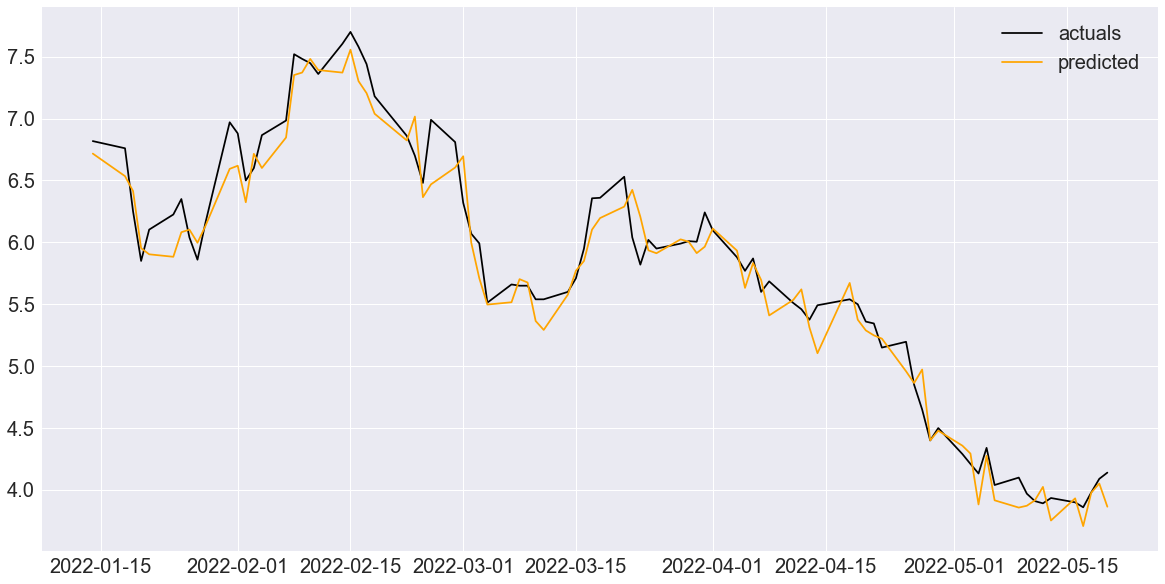

In [231]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test1['crlbf_next_close'], color='black')
ax.plot(y_test1['crlbf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## CRLBF, Cannabis ETFs, and DJIX

In [69]:
df_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs_dow.csv')
df_etfs_dow['Date'] = pd.to_datetime(df_etfs_dow['Date'])
df_etfs_dow = df_etfs_dow.set_index('Date')

In [70]:
df2 = pd.merge(df_crlbf, df_etfs_dow, on='Date', how='left')
df2

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       5.300       5.520      4.742        4.962        174800   
2018-12-04       5.152       5.165      4.186        4.340        269400   
2018-12-06       5.071       5.145      4.320        4.750        217100   
2018-12-07       5.194       5.420      4.999        5.000        187000   
2018-12-10       5.022       5.338      5.022        5.231        165200   
...                ...         ...        ...          ...           ...   
2022-05-17       3.973       4.100      3.900        3.900        328400   
2022-05-18       3.990       4.070      3.800        3.860        554100   
2022-05-19       3.990       4.030      3.840        3.980        436500   
2022-05-20       3.990       4.200      3.878        4.090        329800   
2022-05-23       4.210       4.220      4.080        4.140        266700   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03               NaN             4.340         NaN            NaN   
2018-12-04             4.962             4.750      -0.622      -0.125353   
2018-12-06             4.340             5.000       0.410       0.094470   
2018-12-07             4.750             5.231       0.250       0.052632   
2018-12-10             5.000             5.380       0.231       0.046200   
...                      ...               ...         ...            ...   
2022-05-17             3.935             3.860      -0.035      -0.008895   
2022-05-18             3.900             3.980      -0.040      -0.010256   
2022-05-19             3.860             4.090       0.120       0.031088   
2022-05-20             3.980             4.140       0.110       0.027638   
2022-05-23             4.090               NaN       0.050       0.012225   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                   NaN                  NaN                    NaN   
2018-12-04                   NaN                  NaN                    NaN   
2018-12-06                   NaN                  NaN                    NaN   
2018-12-07                   NaN                  NaN                    NaN   
2018-12-10                4.8566                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17                3.9214              -0.0400                 4.0430   
2022-05-18                3.8994              -0.0220                 4.0080   
2022-05-19                3.9134               0.0140                 3.9927   
2022-05-20                3.9530               0.0396                 3.9677   
2022-05-23                3.9940               0.0410                 3.9777   

            crlbf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-12-03                   NaN  29.850000  30.837999  28.350000  29.100000   
2018-12-04                   NaN  29.200001  29.410000  28.000000  28.100000   
2018-12-06                   NaN  26.400000  27.760000  26.100000  27.549999   
2018-12-07                   NaN  29.900000  29.900000  28.590000  28.920000   
2018-12-10                   NaN  28.920000  29.430000  27.889999  28.600000   
...                          ...        ...        ...        ...        ...   
2022-05-17               -0.0390   7.990000   8.170000   7.880000   8.100000   
2022-05-18               -0.0350   7.940000   8.030000   7.605000   7.620000   
2022-05-19               -0.0153   7.560000   7.860000   7.540000   7.780000   
2022-05-20               -0.0250   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [71]:
df_isna2 = df2.isna()
df_isna2

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       False       False      False        False         False   
2018-12-04       False       False      False        False         False   
2018-12-06       False       False      False        False         False   
2018-12-07       False       False      False        False         False   
2018-12-10       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-17       False       False      False        False         False   
2022-05-18       False       False      False        False         False   
2022-05-19       False       False      False        False         False   
2022-05-20       False       False      False        False         False   
2022-05-23       False       False      False        False         False   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03              True             False        True           True   
2018-12-04             False             False       False          False   
2018-12-06             False             False       False          False   
2018-12-07             False             False       False          False   
2018-12-10             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-17             False             False       False          False   
2022-05-18             False             False       False          False   
2022-05-19             False             False       False          False   
2022-05-20             False             False       False          False   
2022-05-23             False              True       False          False   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                  True                 True                   True   
2018-12-04                  True                 True                   True   
2018-12-06                  True                 True                   True   
2018-12-07                  True                 True                   True   
2018-12-10                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-17                 False                False                  False   
2022-05-18                 False                False                  False   
2022-05-19                 False                False                  False   
2022-05-20                 False                False                  False   
2022-05-23                 False                False                  False   

            crlbf_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2018-12-03                  True    False    False   False     False   
2018-12-04                  True    False    False   False     False   
2018-12-06                  True    False    False   False     False   
2018-12-07                  True    False    False   False     False   
2018-12-10                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-17                 False    False    False   False     False   
2022-05-18                 False    False    False   False     False   
2022-05-19                 False    False    False   False     False   
2022-05-20                 False    False    False   False     False   
2022-05-23                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [72]:
df_isna2 = df_isna2.add_suffix('_b')

In [73]:
df2 = df2.fillna(0)
df2.head()

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       5.300       5.520      4.742        4.962        174800   
2018-12-04       5.152       5.165      4.186        4.340        269400   
2018-12-06       5.071       5.145      4.320        4.750        217100   
2018-12-07       5.194       5.420      4.999        5.000        187000   
2018-12-10       5.022       5.338      5.022        5.231        165200   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03             0.000             4.340       0.000       0.000000   
2018-12-04             4.962             4.750      -0.622      -0.125353   
2018-12-06             4.340             5.000       0.410       0.094470   
2018-12-07             4.750             5.231       0.250       0.052632   
2018-12-10             5.000             5.380       0.231       0.046200   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                0.0000                  0.0                    0.0   
2018-12-04                0.0000                  0.0                    0.0   
2018-12-06                0.0000                  0.0                    0.0   
2018-12-07                0.0000                  0.0                    0.0   
2018-12-10                4.8566                  0.0                    0.0   

            crlbf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-12-03                   0.0  29.850000  30.837999  28.350000  29.100000   
2018-12-04                   0.0  29.200001  29.410000  28.000000  28.100000   
2018-12-06                   0.0  26.400000  27.760000  26.100000  27.549999   
2018-12-07                   0.0  29.900000  29.900000  28.590000  28.920000   
2018-12-10                   0.0  28.920000  29.430000  27.889999  28.600000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-12-03    2254500      29.360001      28.100000 -0.260001   -0.008856   
2018-12-04     628100      29.100000      27.549999 -1.000000   -0.034364   
2018-12-06     921100      28.100000      28.920000 -0.550001   -0.019573   
2018-12-07     964000      27.549999      28.600000  1.370001    0.049728   
2018-12-10     745900      28.920000      29.080000 -0.320000   -0.011065   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-12-03             29.234             0.018              29.333   
2018-12-04             29.124            -0.110              29.193   
2018-12-06             28.680            -0.444              29.058   
2018-12-07             28.606            -0.074              28.980   
2018-12-10             28.454            -0.152              28.835   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-12-03             -0.154        0.0        0.0       0.0         0.0   
2018-12-04             -0.140        0.0        0.0       0.0         0.0   
2018-12-06             -0.135        0.0        0.0       0.0         0.0   
2018-12-07             -0.078        0.0        0.0       0.0         0.0   
2018-12-10             -0.145        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-12-03          0.0              0.0              0.0        0.0   
2018-12-04          0.0

In [74]:
df2 = pd.concat([df2, df_isna2], axis=1)
df2

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       5.300       5.520      4.742        4.962        174800   
2018-12-04       5.152       5.165      4.186        4.340        269400   
2018-12-06       5.071       5.145      4.320        4.750        217100   
2018-12-07       5.194       5.420      4.999        5.000        187000   
2018-12-10       5.022       5.338      5.022        5.231        165200   
...                ...         ...        ...          ...           ...   
2022-05-17       3.973       4.100      3.900        3.900        328400   
2022-05-18       3.990       4.070      3.800        3.860        554100   
2022-05-19       3.990       4.030      3.840        3.980        436500   
2022-05-20       3.990       4.200      3.878        4.090        329800   
2022-05-23       4.210       4.220      4.080        4.140        266700   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03             0.000             4.340       0.000       0.000000   
2018-12-04             4.962             4.750      -0.622      -0.125353   
2018-12-06             4.340             5.000       0.410       0.094470   
2018-12-07             4.750             5.231       0.250       0.052632   
2018-12-10             5.000             5.380       0.231       0.046200   
...                      ...               ...         ...            ...   
2022-05-17             3.935             3.860      -0.035      -0.008895   
2022-05-18             3.900             3.980      -0.040      -0.010256   
2022-05-19             3.860             4.090       0.120       0.031088   
2022-05-20             3.980             4.140       0.110       0.027638   
2022-05-23             4.090             0.000       0.050       0.012225   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                0.0000               0.0000                 0.0000   
2018-12-04                0.0000               0.0000                 0.0000   
2018-12-06                0.0000               0.0000                 0.0000   
2018-12-07                0.0000               0.0000                 0.0000   
2018-12-10                4.8566               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-17                3.9214              -0.0400                 4.0430   
2022-05-18                3.8994              -0.0220                 4.0080   
2022-05-19                3.9134               0.0140                 3.9927   
2022-05-20                3.9530               0.0396                 3.9677   
2022-05-23                3.9940               0.0410                 3.9777   

            crlbf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-12-03                0.0000  29.850000  30.837999  28.350000  29.100000   
2018-12-04                0.0000  29.200001  29.410000  28.000000  28.100000   
2018-12-06                0.0000  26.400000  27.760000  26.100000  27.549999   
2018-12-07                0.0000  29.900000  29.900000  28.590000  28.920000   
2018-12-10                0.0000  28.920000  29.430000  27.889999  28.600000   
...                          ...        ...        ...        ...        ...   
2022-05-17               -0.0390   7.990000   8.170000   7.880000   8.100000   
2022-05-18               -0.0350   7.940000   8.030000   7.605000   7.620000   
2022-05-19               -0.0153   7.560000   7.860000   7.540000   7.780000   
2022-05-20               -0.0250   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [75]:
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['year'] = df2.index.year
df2['quarter'] = (df2['month']-1)//3 + 1

In [76]:
cols = df2.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'crlbf_Open']

In [77]:
df2 = df2[cols].copy()
df2

month  day  year  quarter  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                       
2018-12-03     12    3  2018        4       5.300       5.520      4.742   
2018-12-04     12    4  2018        4       5.152       5.165      4.186   
2018-12-06     12    6  2018        4       5.071       5.145      4.320   
2018-12-07     12    7  2018        4       5.194       5.420      4.999   
2018-12-10     12   10  2018        4       5.022       5.338      5.022   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-17      5   17  2022        2       3.973       4.100      3.900   
2022-05-18      5   18  2022        2       3.990       4.070      3.800   
2022-05-19      5   19  2022        2       3.990       4.030      3.840   
2022-05-20      5   20  2022        2       3.990       4.200      3.878   
2022-05-23      5   23  2022        2       4.210       4.220      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2018-12-03        4.962        174800             0.000             4.340   
2018-12-04        4.340        269400             4.962             4.750   
2018-12-06        4.750        217100             4.340             5.000   
2018-12-07        5.000        187000             4.750             5.231   
2018-12-10        5.231        165200             5.000             5.380   
...                 ...           ...               ...               ...   
2022-05-17        3.900        328400             3.935             3.860   
2022-05-18        3.860        554100             3.900             3.980   
2022-05-19        3.980        436500             3.860             4.090   
2022-05-20        4.090        329800             3.980             4.140   
2022-05-23        4.140        266700             4.090             0.000   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2018-12-03       0.000       0.000000                0.0000   
2018-12-04      -0.622      -0.125353                0.0000   
2018-12-06       0.410       0.094470                0.0000   
2018-12-07       0.250       0.052632                0.0000   
2018-12-10       0.231       0.046200                4.8566   
...                ...            ...                   ...   
2022-05-17      -0.035      -0.008895                3.9214   
2022-05-18      -0.040      -0.010256                3.8994   
2022-05-19       0.120       0.031088                3.9134   
2022-05-20       0.110       0.027638                3.9530   
2022-05-23       0.050       0.012225                3.9940   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-12-03               0.0000                 0.0000                0.0000   
2018-12-04               0.0000                 0.0000                0.0000   
2018-12-06               0.0000                 0.0000                0.0000   
2018-12-07               0.0000                 0.0000                0.0000   
2018-12-10               0.0000                 0.0000                0.0000   
...                         ...                    ...                   ...   
2022-05-17              -0.0400                 4.0430               -0.0390   
2022-05-18              -0.0220                 4.0080               -0.0350   
2022-05-19               0.0140                 3.9927               -0.0153   
2022-05-20               0.0396                 3.9677               -0.0250   
2022-05-23               0.0410                 3.9777                0.0100   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2018-12-03  29.850000 

In [78]:
df2.drop(df2.tail(1).index, inplace=True)

In [79]:
n = int(len(df2) * 0.9)
n

785

In [80]:
train2 = df2[:n]
test2 = df2[n:]

In [81]:
print(len(train2))
print(len(test2))

785
88


In [82]:
X_train2 = train2.drop('crlbf_next_close', axis=1)
X_train2.head(3)

month  day  year  quarter  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                       
2018-12-03     12    3  2018        4       5.300       5.520      4.742   
2018-12-04     12    4  2018        4       5.152       5.165      4.186   
2018-12-06     12    6  2018        4       5.071       5.145      4.320   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_diff  \
Date                                                                  
2018-12-03        4.962        174800             0.000       0.000   
2018-12-04        4.340        269400             4.962      -0.622   
2018-12-06        4.750        217100             4.340       0.410   

            crlbf_%change  crlbf_5day_avg_close  crlbf_5day_avg_diff  \
Date                                                                   
2018-12-03       0.000000                   0.0                  0.0   
2018-12-04      -0.125353                   0.0                  0.0   
2018-12-06       0.094470                   0.0                  0.0   

            crlbf_10day_avg_close  crlbf_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2018-12-03                    0.0                   0.0  29.850000  30.837999   
2018-12-04                    0.0                   0.0  29.200001  29.410000   
2018-12-06                    0.0                   0.0  26.400000  27.760000   

            mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                     
2018-12-03   28.35  29.100000    2254500      29.360001      28.100000   
2018-12-04   28.00  28.100000     628100      29.100000      27.549999   
2018-12-06   26.10  27.549999     921100      28.100000      28.920000   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2018-12-03 -0.260001   -0.008856             29.234             0.018   
2018-12-04 -1.000000   -0.034364             29.124            -0.110   
2018-12-06 -0.550001   -0.019573             28.680            -0.444   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2018-12-03              29.333             -0.154        0.0        0.0   
2018-12-04              29.193             -0.140        0.0        0.0   
2018-12-06              29.058             -0.135        0.0        0.0   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2018-12-03       0.0         0.0          0.0              0.0   
2018-12-04       0.0         0.0          0.0              0.0   
2018-12-06       0.0         0.0          0.0              0.0   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2018-12-03              0.0        0.0           0.0                  0.0   
2018-12-04              0.0        0.0           0.0                  0.0   
2018-12-06              0.0        0.0           0.0                  0.0   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2018-12-03                 0.0                   0.0                  0.0   
2018-12-04                 0.0                   0.0                  0.0   
2018-12-06                 0.0                   0.0                  0.0   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2018-12-03        0.0        0.0       0.0         0.0          0.0   
2018-12-04        0.0        0.0       0.0         0.0          0.0   
2018-12-

In [83]:
X_train2.shape

(785, 185)

In [84]:
y_train2 = train2['crlbf_next_close']
y_train2.head(3)

Date
2018-12-03    4.34
2018-12-04    4.75
2018-12-06    5.00
Name: crlbf_next_close, dtype: float64

In [85]:
y_train2.tail(3)

Date
2022-01-11    6.767
2022-01-12    6.880
2022-01-13    6.910
Name: crlbf_next_close, dtype: float64

In [86]:
X_test2 = test2.drop('crlbf_next_close', axis=1)
y_test2 = test2['crlbf_next_close']

In [87]:
X_test2.head(3)

month  day  year  quarter  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                       
2022-01-14      1   14  2022        1        6.80        6.98       6.61   
2022-01-18      1   18  2022        1        6.53        6.92       6.50   
2022-01-19      1   19  2022        1        6.90        6.90       6.44   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_diff  \
Date                                                                  
2022-01-14        6.910        418000             6.880       0.030   
2022-01-18        6.818        502100             6.910      -0.092   
2022-01-19        6.760        658100             6.818      -0.058   

            crlbf_%change  crlbf_5day_avg_close  crlbf_5day_avg_diff  \
Date                                                                   
2022-01-14       0.004360                6.7614               0.0760   
2022-01-18      -0.013314                6.8030               0.0416   
2022-01-19      -0.008507                6.8270               0.0240   

            crlbf_10day_avg_close  crlbf_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2022-01-14                 6.6027                0.0240    10.83   10.905   
2022-01-18                 6.6095                0.0068    10.71   10.810   
2022-01-19                 6.6305                0.0210    10.55   10.630   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2022-01-14   10.65     10.85     865400          10.85          10.44   
2022-01-18   10.44     10.44     918300          10.85          10.27   
2022-01-19   10.26     10.27    1095300          10.44          10.12   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2022-01-14     0.00    0.000000             11.048            -0.004   
2022-01-18    -0.41   -0.037788             10.922            -0.126   
2022-01-19    -0.17   -0.016284             10.714            -0.208   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2022-01-14              11.028             -0.023  24.219999  24.389999   
2022-01-18              10.929             -0.099  24.450001  24.510000   
2022-01-19              10.827             -0.102  24.379999  24.379999   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2022-01-14  23.820000   24.340000     710800.0        24.559999   
2022-01-18  23.950001   24.030001    1163200.0        24.340000   
2022-01-19  23.065001   23.520000    1591900.0        24.030001   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2022-01-14        24.030001  -0.219999     -0.008958               24.564   
2022-01-18        23.520000  -0.309999     -0.012736               24.484   
2022-01-19        22.350000  -0.510001     -0.021224               24.248   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2022-01-14              -0.022                24.511               -0.125   
2022-01-18              -0.080                24.335               -0.176   
2022-01-19              -0.236                24.209               -0.126   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2022-01-14      11.77      12.00     11.65       11.87     141700.0   
2022-01-18      11.65      11.86     11.57       11.67     130800.0   
2022-01-19      11.85      11.85 

In [88]:
X_test2.shape

(88, 185)

In [89]:
y_test2.tail(3)

Date
2022-05-18    3.98
2022-05-19    4.09
2022-05-20    4.14
Name: crlbf_next_close, dtype: float64

In [90]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [91]:
y_pred2[:5]

array([6.67199423, 6.47749692, 6.36042404, 5.90115355, 5.87602057])

In [92]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man2 = rmse_manual(y_test2, y_pred2)
print(rmse_man2)

0.198894568031298


In [93]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man2 = mae_manual(y_test2, y_pred2)
print(mae_man2)

0.1627444587721798


In [94]:
y_train2 = pd.DataFrame(y_train2, columns=['crlbf_next_close'])
y_test2 = pd.DataFrame(y_test2, columns=['crlbf_next_close'])

In [95]:
y_test2['crlbf_pred_next_close'] = y_pred2

In [96]:
y_test2.tail()

crlbf_next_close  crlbf_pred_next_close
Date                                               
2022-05-16              3.90               4.005596
2022-05-17              3.86               3.617509
2022-05-18              3.98               3.923528
2022-05-19              4.09               4.080062
2022-05-20              4.14               3.921987

In [97]:
hyper_table.append(dict(stock='crlbf', 
                        version='1+ETFs+Dow',
                        model=model2, 
                        rmse=rmse_man2,
                        mae=mae_man2,
                        actual_price=y_test2['crlbf_next_close'][-1],
                        predicted_price=y_test2['crlbf_pred_next_close'][-1],
                        rows=df2.shape[0], 
                        train_rows=X_train2.shape[0],
                        test_rows=X_test2.shape[0],
                        columns=df2.shape[1]))

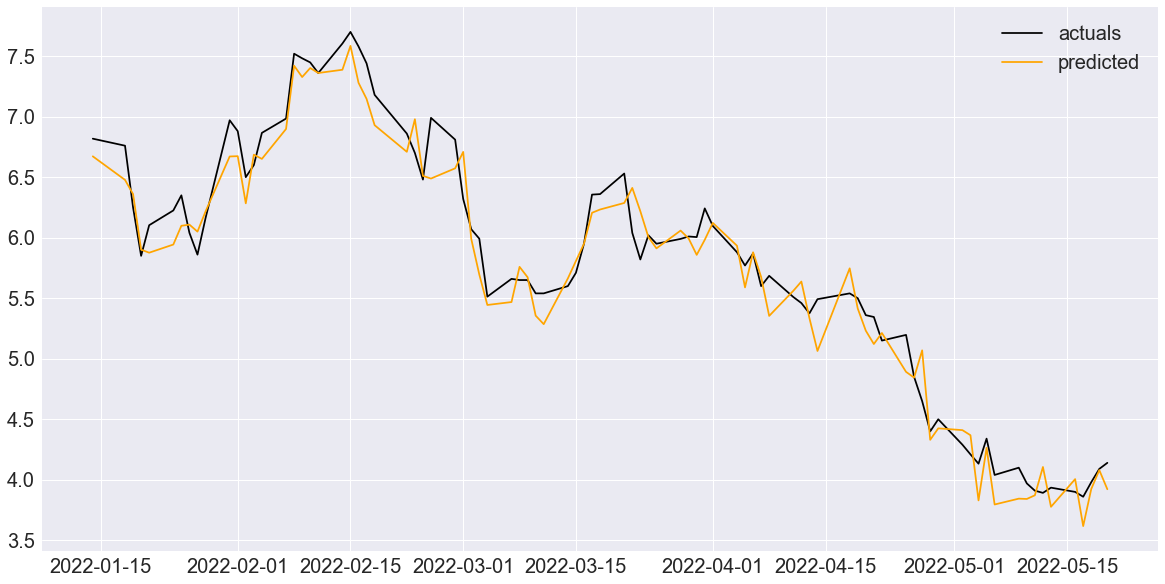

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test2['crlbf_next_close'], color='black')
ax.plot(y_test2['crlbf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CRLBF target)

In [99]:
df_all = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.set_index('Date')

In [100]:
df_isna3 = df_all.isna()
df_isna3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [101]:
df_isna3 = df_isna3.add_suffix('_b')

In [102]:
df3 = df_all.fillna(0)
df3.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [103]:
df3 = pd.concat([df3, df_isna3], axis=1)
df3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [104]:
df3['month'] = df3.index.month
df3['day'] = df3.index.day
df3['year'] = df3.index.year
df3['quarter'] = (df3['month']-1)//3 + 1

In [105]:
cols = df3.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [106]:
df3 = df3[cols].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [107]:
df3 = df3[cut:].copy().copy()
df3

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-12-03     12    3  2018        4  34.500000  35.180000  32.360001   
2018-12-04     12    4  2018        4  32.860001  33.160000  31.219999   
2018-12-06     12    6  2018        4  28.790001  30.650000  28.100000   
2018-12-07     12    7  2018        4  32.389999  32.549999  30.799999   
2018-12-10     12   10  2018        4  31.459999  32.169998  30.209999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-12-03  33.330002    10851200       33.549999       31.450001 -0.219997   
2018-12-04  31.450001     6717200       33.330002       30.340000 -1.880001   
2018-12-06  30.340000    10718200       31.450001       31.400000 -1.110001   
2018-12-07  31.400000     6149600       30.340000       31.020000  1.060000   
2018-12-10  31.020000     4580200       31.400000       33.160000 -0.380000   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-12-03    -0.006557           33.152000           0.356001   
2018-12-04    -0.056406           33.102000          -0.050000   
2018-12-06    -0.035294           32.370000          -0.732000   
2018-12-07     0.034937           32.014000          -0.356000   
2018-12-10    -0.012102           31.508001          -0.506000   
...                 ...                 ...                ...   
2022-05-17     0.027923            5.578000           0.090000   
2022-05-18    -0.050934            5.700000           0.122000   
2022-05-19     0.050089            5.800000           0.100000   
2022-05-20    -0.059625            5.720000          -0.080000   
2022-05-23    -0.059783            5.612000          -0.108000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-12-03            32.954000              -0.188       5.300       5.520   
2018-12-04            32.822001              -0.132       5.152       5.165   
2018-12-06            32.640000              -0.182       5.071       5.145   
2018-12-07            32.406000              -0.234       5.194       5.420   
2018-12-10            32.152000              -0.254       5.022       5.338   
...                         ...                 ...         ...         ...   
2022-05-17             5.759000              -0.017       3.973       4.100   
2022-05-18             5.651000              -0.108       3.990       4.070   
2022-05-19             5.631000              -0.020       3.990       4.030   
2022-05-20             5.586000              -0.045       3.990       4.200   
2022-05-23             5.550000              -0.036       4.210       4.220   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [108]:
df3.drop(df3.tail(1).index, inplace=True)

In [109]:
n = int(len(df3) * 0.9)
n

785

In [110]:
train3 = df3[:n]
test3 = df3[n:]

In [111]:
print(len(train3))
print(len(test3))

785
88


In [112]:
X_train3 = train3.drop('crlbf_next_close', axis=1)
X_train3.head(3)

month  day  year  quarter   cgc_Open  cgc_High    cgc_Low  \
Date                                                                    
2018-12-03     12    3  2018        4  34.500000     35.18  32.360001   
2018-12-04     12    4  2018        4  32.860001     33.16  31.219999   
2018-12-06     12    6  2018        4  28.790001     30.65  28.100000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-12-03  33.330002    10851200       33.549999       31.450001 -0.219997   
2018-12-04  31.450001     6717200       33.330002       30.340000 -1.880001   
2018-12-06  30.340000    10718200       31.450001       31.400000 -1.110001   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-12-03    -0.006557              33.152           0.356001   
2018-12-04    -0.056406              33.102          -0.050000   
2018-12-06    -0.035294              32.370          -0.732000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-12-03            32.954000              -0.188       5.300       5.520   
2018-12-04            32.822001              -0.132       5.152       5.165   
2018-12-06            32.640000              -0.182       5.071       5.145   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-12-03      4.742        4.962      174800.0             0.000   
2018-12-04      4.186        4.340      269400.0             4.962   
2018-12-06      4.320        4.750      217100.0             4.340   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2018-12-03       0.000       0.000000                   0.0   
2018-12-04      -0.622      -0.125353                   0.0   
2018-12-06       0.410       0.094470                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-12-03                  0.0                    0.0                   0.0   
2018-12-04                  0.0                    0.0                   0.0   
2018-12-06                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-12-03       9.25     11.890      8.51       10.17   45161900.0   
2018-12-04      10.97     11.200     10.38       10.74   26371000.0   
2018-12-06       9.92     10.565      9.76       10.45   12016300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-12-03             9.15            10.74       1.02      0.111475   
2018-12-04            10.17            10.45       0.57      0.056047   
2018-12-06            10.74            12.72      -0.29     -0.027002   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-12-03                9.044               0.368                 8.733   
2018-12-04                9.534               0.490                 8.983   
2018-12-06                9.884               0.350                 9.208   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-12-03                0.161       5.487       6.500      4.550   
2018-12-04                0.250       4.666       4.705      3.883   
2018-12-06                0.225       4.079       5.478      4.048 

In [113]:
X_train3.shape

(785, 263)

In [114]:
y_train3 = train3['crlbf_next_close']
y_train3.head(3)

Date
2018-12-03    4.34
2018-12-04    4.75
2018-12-06    5.00
Name: crlbf_next_close, dtype: float64

In [115]:
y_train3.tail(3)

Date
2022-01-11    6.767
2022-01-12    6.880
2022-01-13    6.910
Name: crlbf_next_close, dtype: float64

In [116]:
X_test3 = test3.drop('crlbf_next_close', axis=1)
y_test3 = test3['crlbf_next_close']

In [117]:
X_test3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-01-14      1   14  2022        1      8.38     8.460    8.085       8.40   
2022-01-18      1   18  2022        1      8.22     8.303    7.760       7.78   
2022-01-19      1   19  2022        1      7.81     8.010    7.610       7.64   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-01-14     5799800            8.41            7.78     -0.01    -0.001189   
2022-01-18     7160200            8.40            7.64     -0.62    -0.073810   
2022-01-19     5854400            7.78            7.56     -0.14    -0.017995   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-01-14               8.718             -0.024                8.696   
2022-01-18               8.524             -0.194                8.544   
2022-01-19               8.230             -0.294                8.411   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-01-14              -0.033        6.80        6.98       6.61   
2022-01-18              -0.152        6.53        6.92       6.50   
2022-01-19              -0.133        6.90        6.90       6.44   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_diff  \
Date                                                                  
2022-01-14        6.910      418000.0             6.880       0.030   
2022-01-18        6.818      502100.0             6.910      -0.092   
2022-01-19        6.760      658100.0             6.818      -0.058   

            crlbf_%change  crlbf_5day_avg_close  crlbf_5day_avg_diff  \
Date                                                                   
2022-01-14       0.004360                6.7614               0.0760   
2022-01-18      -0.013314                6.8030               0.0416   
2022-01-19      -0.008507                6.8270               0.0240   

            crlbf_10day_avg_close  crlbf_10day_avg_diff  cron_Open  cron_High  \
Date                                                                            
2022-01-14                 6.6027                0.0240       3.88       3.94   
2022-01-18                 6.6095                0.0068       3.83       3.86   
2022-01-19                 6.6305                0.0210       3.70       3.74   

            cron_Low  cron_Close  cron_Volume  cron_prev_close  \
Date                                                             
2022-01-14     3.785        3.93    1915200.0             3.90   
2022-01-18     3.670        3.68    3009600.0             3.93   
2022-01-19     3.580        3.59    2487300.0             3.68   

            cron_next_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2022-01-14             3.68       0.03      0.007692                3.976   
2022-01-18             3.59      -0.25     -0.063613                3.920   
2022-01-19             3.57      -0.09     -0.024457                3.826   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2022-01-14               0.006                 3.976                0.001   
2022-01-18              -0.056                 3.924               -0.052   
2022-01-19              -0.094                 3.872               -0.052   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2022-01-14        8.22       8.270       8.00        8.230      342500.0   
2022-01-18        7.93       

In [118]:
X_test3.shape

(88, 263)

In [119]:
y_test3.tail(3)

Date
2022-05-18    3.98
2022-05-19    4.09
2022-05-20    4.14
Name: crlbf_next_close, dtype: float64

In [120]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [121]:
y_pred3[:5]

array([6.59664412, 6.54499069, 6.17707375, 6.02076753, 5.58379013])

In [122]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man3 = rmse_manual(y_test3, y_pred3)
print(rmse_man3)

0.269273117909176


In [123]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man3 = mae_manual(y_test3, y_pred3)
print(mae_man3)

0.22293609152720253


In [124]:
y_train3 = pd.DataFrame(y_train3, columns=['crlbf_next_close'])
y_test3 = pd.DataFrame(y_test3, columns=['crlbf_next_close'])

In [125]:
y_test3['crlbf_pred_next_close'] = y_pred3

In [126]:
y_test3.tail()

crlbf_next_close  crlbf_pred_next_close
Date                                               
2022-05-16              3.90               3.665807
2022-05-17              3.86               3.596164
2022-05-18              3.98               3.822989
2022-05-19              4.09               3.983329
2022-05-20              4.14               3.666331

In [127]:
hyper_table.append(dict(stock='crlbf', 
                        version='All stocks',
                        model=model3, 
                        rmse=rmse_man3,
                        mae=mae_man3,
                        actual_price=y_test3['crlbf_next_close'][-1],
                        predicted_price=y_test3['crlbf_pred_next_close'][-1],
                        rows=df3.shape[0], 
                        train_rows=X_train3.shape[0],
                        test_rows=X_test3.shape[0],
                        columns=df3.shape[1]))

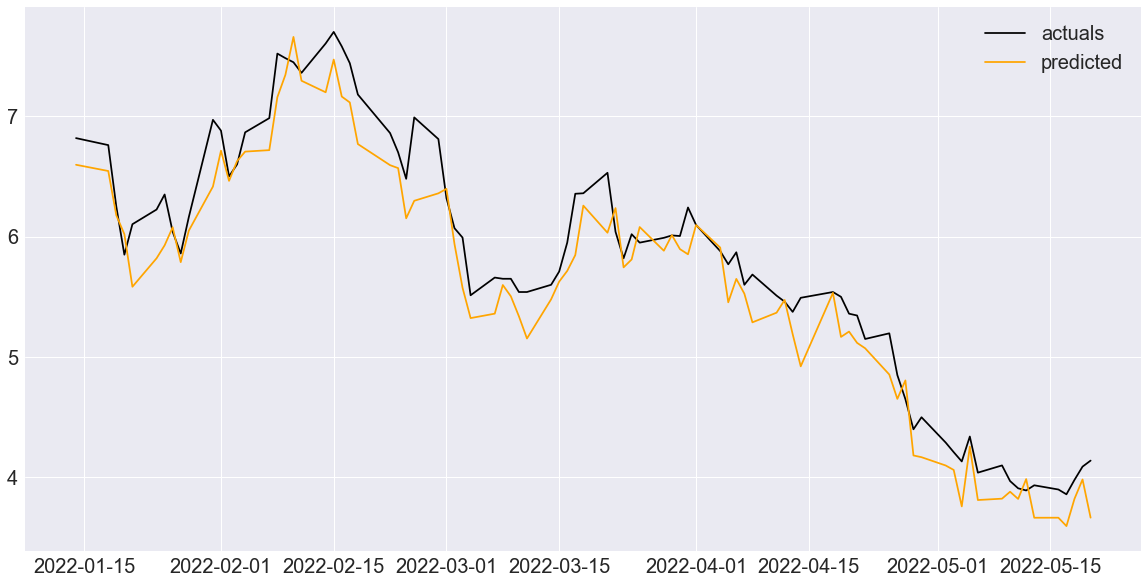

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test3['crlbf_next_close'], color='black')
ax.plot(y_test3['crlbf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CRLBF target) and DJIX

In [129]:
df_all_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_dow.csv')
df_all_dow['Date'] = pd.to_datetime(df_all_dow['Date'])
df_all_dow = df_all_dow.set_index('Date')

In [130]:
df_isna4 = df_all_dow.isna()
df_isna4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [131]:
df_isna4 = df_isna4.add_suffix('_b')

In [132]:
df4 = df_all_dow.fillna(0)
df4.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [133]:
df4 = pd.concat([df4, df_isna4], axis=1)
df4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [134]:
df4['month'] = df4.index.month
df4['day'] = df4.index.day
df4['year'] = df4.index.year
df4['quarter'] = (df4['month']-1)//3 + 1

In [135]:
cols = df4.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [136]:
df4 = df4[cols].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [137]:
df4 = df4[cut:].copy().copy()
df4

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-12-03     12    3  2018        4  34.500000  35.180000  32.360001   
2018-12-04     12    4  2018        4  32.860001  33.160000  31.219999   
2018-12-06     12    6  2018        4  28.790001  30.650000  28.100000   
2018-12-07     12    7  2018        4  32.389999  32.549999  30.799999   
2018-12-10     12   10  2018        4  31.459999  32.169998  30.209999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-12-03  33.330002    10851200       33.549999       31.450001 -0.219997   
2018-12-04  31.450001     6717200       33.330002       30.340000 -1.880001   
2018-12-06  30.340000    10718200       31.450001       31.400000 -1.110001   
2018-12-07  31.400000     6149600       30.340000       31.020000  1.060000   
2018-12-10  31.020000     4580200       31.400000       33.160000 -0.380000   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-12-03    -0.006557           33.152000           0.356001   
2018-12-04    -0.056406           33.102000          -0.050000   
2018-12-06    -0.035294           32.370000          -0.732000   
2018-12-07     0.034937           32.014000          -0.356000   
2018-12-10    -0.012102           31.508001          -0.506000   
...                 ...                 ...                ...   
2022-05-17     0.027923            5.578000           0.090000   
2022-05-18    -0.050934            5.700000           0.122000   
2022-05-19     0.050089            5.800000           0.100000   
2022-05-20    -0.059625            5.720000          -0.080000   
2022-05-23    -0.059783            5.612000          -0.108000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-12-03            32.954000              -0.188       5.300       5.520   
2018-12-04            32.822001              -0.132       5.152       5.165   
2018-12-06            32.640000              -0.182       5.071       5.145   
2018-12-07            32.406000              -0.234       5.194       5.420   
2018-12-10            32.152000              -0.254       5.022       5.338   
...                         ...                 ...         ...         ...   
2022-05-17             5.759000              -0.017       3.973       4.100   
2022-05-18             5.651000              -0.108       3.990       4.070   
2022-05-19             5.631000              -0.020       3.990       4.030   
2022-05-20             5.586000              -0.045       3.990       4.200   
2022-05-23             5.550000              -0.036       4.210       4.220   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [138]:
df4.drop(df4.tail(1).index, inplace=True)

In [139]:
n = int(len(df4) * 0.9)
n

785

In [140]:
train4 = df4[:n]
test4 = df4[n:]

In [141]:
print(len(train4))
print(len(test4))

785
88


In [142]:
X_train4 = train4.drop('crlbf_next_close', axis=1)
X_train4.head(3)

month  day  year  quarter   cgc_Open  cgc_High    cgc_Low  \
Date                                                                    
2018-12-03     12    3  2018        4  34.500000     35.18  32.360001   
2018-12-04     12    4  2018        4  32.860001     33.16  31.219999   
2018-12-06     12    6  2018        4  28.790001     30.65  28.100000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-12-03  33.330002    10851200       33.549999       31.450001 -0.219997   
2018-12-04  31.450001     6717200       33.330002       30.340000 -1.880001   
2018-12-06  30.340000    10718200       31.450001       31.400000 -1.110001   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-12-03    -0.006557              33.152           0.356001   
2018-12-04    -0.056406              33.102          -0.050000   
2018-12-06    -0.035294              32.370          -0.732000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-12-03            32.954000              -0.188       5.300       5.520   
2018-12-04            32.822001              -0.132       5.152       5.165   
2018-12-06            32.640000              -0.182       5.071       5.145   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-12-03      4.742        4.962      174800.0             0.000   
2018-12-04      4.186        4.340      269400.0             4.962   
2018-12-06      4.320        4.750      217100.0             4.340   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2018-12-03       0.000       0.000000                   0.0   
2018-12-04      -0.622      -0.125353                   0.0   
2018-12-06       0.410       0.094470                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-12-03                  0.0                    0.0                   0.0   
2018-12-04                  0.0                    0.0                   0.0   
2018-12-06                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-12-03       9.25     11.890      8.51       10.17   45161900.0   
2018-12-04      10.97     11.200     10.38       10.74   26371000.0   
2018-12-06       9.92     10.565      9.76       10.45   12016300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-12-03             9.15            10.74       1.02      0.111475   
2018-12-04            10.17            10.45       0.57      0.056047   
2018-12-06            10.74            12.72      -0.29     -0.027002   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-12-03                9.044               0.368                 8.733   
2018-12-04                9.534               0.490                 8.983   
2018-12-06                9.884               0.350                 9.208   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-12-03                0.161       5.487       6.500      4.550   
2018-12-04                0.250       4.666       4.705      3.883   
2018-12-06                0.225       4.079       5.478      4.048 

In [143]:
X_train4.shape

(785, 289)

In [144]:
y_train4 = train4['crlbf_next_close']
y_train4.head(3)

Date
2018-12-03    4.34
2018-12-04    4.75
2018-12-06    5.00
Name: crlbf_next_close, dtype: float64

In [145]:
y_train4.tail(3)

Date
2022-01-11    6.767
2022-01-12    6.880
2022-01-13    6.910
Name: crlbf_next_close, dtype: float64

In [146]:
X_test4 = test4.drop('crlbf_next_close', axis=1)
y_test4 = test4['crlbf_next_close']

In [147]:
X_test4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-01-14      1   14  2022        1      8.38     8.460    8.085       8.40   
2022-01-18      1   18  2022        1      8.22     8.303    7.760       7.78   
2022-01-19      1   19  2022        1      7.81     8.010    7.610       7.64   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-01-14     5799800            8.41            7.78     -0.01    -0.001189   
2022-01-18     7160200            8.40            7.64     -0.62    -0.073810   
2022-01-19     5854400            7.78            7.56     -0.14    -0.017995   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-01-14               8.718             -0.024                8.696   
2022-01-18               8.524             -0.194                8.544   
2022-01-19               8.230             -0.294                8.411   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-01-14              -0.033        6.80        6.98       6.61   
2022-01-18              -0.152        6.53        6.92       6.50   
2022-01-19              -0.133        6.90        6.90       6.44   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_diff  \
Date                                                                  
2022-01-14        6.910      418000.0             6.880       0.030   
2022-01-18        6.818      502100.0             6.910      -0.092   
2022-01-19        6.760      658100.0             6.818      -0.058   

            crlbf_%change  crlbf_5day_avg_close  crlbf_5day_avg_diff  \
Date                                                                   
2022-01-14       0.004360                6.7614               0.0760   
2022-01-18      -0.013314                6.8030               0.0416   
2022-01-19      -0.008507                6.8270               0.0240   

            crlbf_10day_avg_close  crlbf_10day_avg_diff  cron_Open  cron_High  \
Date                                                                            
2022-01-14                 6.6027                0.0240       3.88       3.94   
2022-01-18                 6.6095                0.0068       3.83       3.86   
2022-01-19                 6.6305                0.0210       3.70       3.74   

            cron_Low  cron_Close  cron_Volume  cron_prev_close  \
Date                                                             
2022-01-14     3.785        3.93    1915200.0             3.90   
2022-01-18     3.670        3.68    3009600.0             3.93   
2022-01-19     3.580        3.59    2487300.0             3.68   

            cron_next_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2022-01-14             3.68       0.03      0.007692                3.976   
2022-01-18             3.59      -0.25     -0.063613                3.920   
2022-01-19             3.57      -0.09     -0.024457                3.826   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2022-01-14               0.006                 3.976                0.001   
2022-01-18              -0.056                 3.924               -0.052   
2022-01-19              -0.094                 3.872               -0.052   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2022-01-14        8.22       8.270       8.00        8.230      342500.0   
2022-01-18        7.93       

In [148]:
X_test4.shape

(88, 289)

In [149]:
y_test4.tail(3)

Date
2022-05-18    3.98
2022-05-19    4.09
2022-05-20    4.14
Name: crlbf_next_close, dtype: float64

In [150]:
model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

In [151]:
y_pred4[:5]

array([6.60937902, 6.5578349 , 6.18528637, 6.03890431, 5.57425387])

In [152]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man4 = rmse_manual(y_test4, y_pred4)
print(rmse_man4)

0.24690597393165412


In [153]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man4 = mae_manual(y_test4, y_pred4)
print(mae_man4)

0.201210425616315


In [154]:
y_train4 = pd.DataFrame(y_train4, columns=['crlbf_next_close'])
y_test4 = pd.DataFrame(y_test4, columns=['crlbf_next_close'])

In [155]:
y_test4['crlbf_pred_next_close'] = y_pred4

In [156]:
y_test4.tail()

crlbf_next_close  crlbf_pred_next_close
Date                                               
2022-05-16              3.90               3.734939
2022-05-17              3.86               3.532802
2022-05-18              3.98               3.818255
2022-05-19              4.09               4.001541
2022-05-20              4.14               3.763344

In [157]:
hyper_table.append(dict(stock='crlbf', 
                        version='All+Dow',
                        model=model4, 
                        rmse=rmse_man4,
                        mae=mae_man4,
                        actual_price=y_test4['crlbf_next_close'][-1],
                        predicted_price=y_test4['crlbf_pred_next_close'][-1],
                        rows=df4.shape[0], 
                        train_rows=X_train4.shape[0],
                        test_rows=X_test4.shape[0],
                        columns=df4.shape[1]))

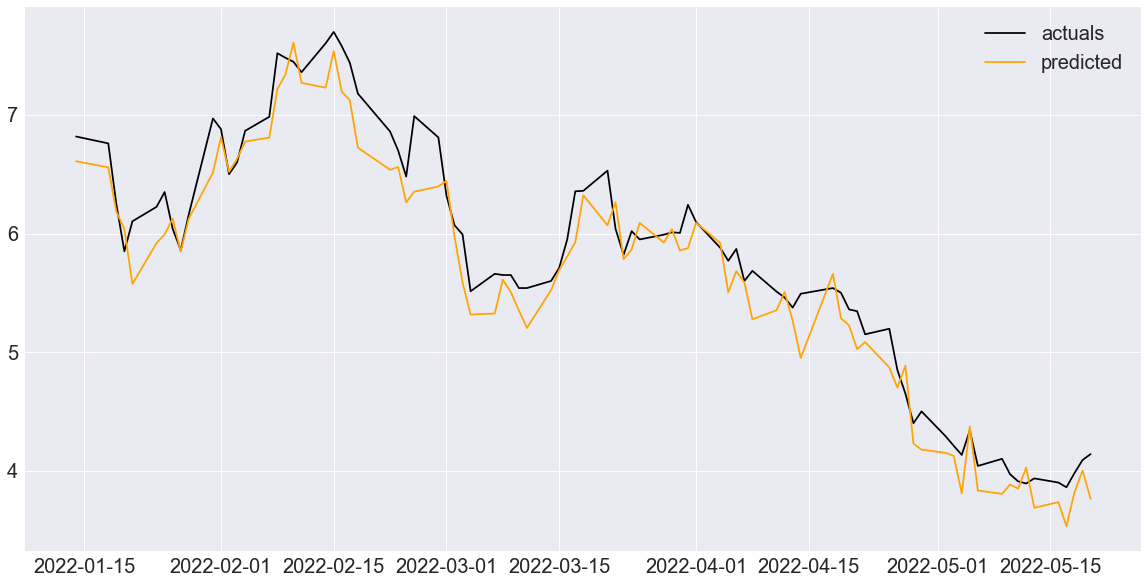

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test4['crlbf_next_close'], color='black')
ax.plot(y_test4['crlbf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CRLBF target) and Cannabis ETFs

In [159]:
df_all_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs.csv')
df_all_etfs['Date'] = pd.to_datetime(df_all_etfs['Date'])
df_all_etfs = df_all_etfs.set_index('Date')

In [160]:
df_isna5 = df_all_etfs.isna()
df_isna5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [161]:
df_isna5 = df_isna5.add_suffix('_b')

In [162]:
df5 = df_all_etfs.fillna(0)
df5.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [163]:
df5 = pd.concat([df5, df_isna5], axis=1)
df5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [164]:
df5['month'] = df5.index.month
df5['day'] = df5.index.day
df5['year'] = df5.index.year
df5['quarter'] = (df5['month']-1)//3 + 1

In [165]:
cols = df5.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [166]:
df5 = df5[cols].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [167]:
df5 = df5[cut:].copy().copy()
df5

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-12-03     12    3  2018        4  34.500000  35.180000  32.360001   
2018-12-04     12    4  2018        4  32.860001  33.160000  31.219999   
2018-12-06     12    6  2018        4  28.790001  30.650000  28.100000   
2018-12-07     12    7  2018        4  32.389999  32.549999  30.799999   
2018-12-10     12   10  2018        4  31.459999  32.169998  30.209999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-12-03  33.330002    10851200       33.549999       31.450001 -0.219997   
2018-12-04  31.450001     6717200       33.330002       30.340000 -1.880001   
2018-12-06  30.340000    10718200       31.450001       31.400000 -1.110001   
2018-12-07  31.400000     6149600       30.340000       31.020000  1.060000   
2018-12-10  31.020000     4580200       31.400000       33.160000 -0.380000   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-12-03    -0.006557           33.152000           0.356001   
2018-12-04    -0.056406           33.102000          -0.050000   
2018-12-06    -0.035294           32.370000          -0.732000   
2018-12-07     0.034937           32.014000          -0.356000   
2018-12-10    -0.012102           31.508001          -0.506000   
...                 ...                 ...                ...   
2022-05-17     0.027923            5.578000           0.090000   
2022-05-18    -0.050934            5.700000           0.122000   
2022-05-19     0.050089            5.800000           0.100000   
2022-05-20    -0.059625            5.720000          -0.080000   
2022-05-23    -0.059783            5.612000          -0.108000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-12-03            32.954000              -0.188       5.300       5.520   
2018-12-04            32.822001              -0.132       5.152       5.165   
2018-12-06            32.640000              -0.182       5.071       5.145   
2018-12-07            32.406000              -0.234       5.194       5.420   
2018-12-10            32.152000              -0.254       5.022       5.338   
...                         ...                 ...         ...         ...   
2022-05-17             5.759000              -0.017       3.973       4.100   
2022-05-18             5.651000              -0.108       3.990       4.070   
2022-05-19             5.631000              -0.020       3.990       4.030   
2022-05-20             5.586000              -0.045       3.990       4.200   
2022-05-23             5.550000              -0.036       4.210       4.220   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [168]:
df5.drop(df5.tail(1).index, inplace=True)

In [169]:
n = int(len(df5) * 0.9)
n

785

In [170]:
train5 = df5[:n]
test5 = df5[n:]

In [171]:
print(len(train5))
print(len(test5))

785
88


In [172]:
X_train5 = train5.drop('crlbf_next_close', axis=1)
X_train5.head(3)

month  day  year  quarter   cgc_Open  cgc_High    cgc_Low  \
Date                                                                    
2018-12-03     12    3  2018        4  34.500000     35.18  32.360001   
2018-12-04     12    4  2018        4  32.860001     33.16  31.219999   
2018-12-06     12    6  2018        4  28.790001     30.65  28.100000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-12-03  33.330002    10851200       33.549999       31.450001 -0.219997   
2018-12-04  31.450001     6717200       33.330002       30.340000 -1.880001   
2018-12-06  30.340000    10718200       31.450001       31.400000 -1.110001   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-12-03    -0.006557              33.152           0.356001   
2018-12-04    -0.056406              33.102          -0.050000   
2018-12-06    -0.035294              32.370          -0.732000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-12-03            32.954000              -0.188       5.300       5.520   
2018-12-04            32.822001              -0.132       5.152       5.165   
2018-12-06            32.640000              -0.182       5.071       5.145   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-12-03      4.742        4.962      174800.0             0.000   
2018-12-04      4.186        4.340      269400.0             4.962   
2018-12-06      4.320        4.750      217100.0             4.340   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2018-12-03       0.000       0.000000                   0.0   
2018-12-04      -0.622      -0.125353                   0.0   
2018-12-06       0.410       0.094470                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-12-03                  0.0                    0.0                   0.0   
2018-12-04                  0.0                    0.0                   0.0   
2018-12-06                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-12-03       9.25     11.890      8.51       10.17   45161900.0   
2018-12-04      10.97     11.200     10.38       10.74   26371000.0   
2018-12-06       9.92     10.565      9.76       10.45   12016300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-12-03             9.15            10.74       1.02      0.111475   
2018-12-04            10.17            10.45       0.57      0.056047   
2018-12-06            10.74            12.72      -0.29     -0.027002   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-12-03                9.044               0.368                 8.733   
2018-12-04                9.534               0.490                 8.983   
2018-12-06                9.884               0.350                 9.208   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-12-03                0.161       5.487       6.500      4.550   
2018-12-04                0.250       4.666       4.705      3.883   
2018-12-06                0.225       4.079       5.478      4.048 

In [173]:
X_train5.shape

(785, 393)

In [174]:
y_train5 = train5['crlbf_next_close']
y_train5.head(3)

Date
2018-12-03    4.34
2018-12-04    4.75
2018-12-06    5.00
Name: crlbf_next_close, dtype: float64

In [175]:
y_train5.tail(3)

Date
2022-01-11    6.767
2022-01-12    6.880
2022-01-13    6.910
Name: crlbf_next_close, dtype: float64

In [176]:
X_test5 = test5.drop('crlbf_next_close', axis=1)
y_test5 = test5['crlbf_next_close']

In [177]:
X_test5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-01-14      1   14  2022        1      8.38     8.460    8.085       8.40   
2022-01-18      1   18  2022        1      8.22     8.303    7.760       7.78   
2022-01-19      1   19  2022        1      7.81     8.010    7.610       7.64   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-01-14     5799800            8.41            7.78     -0.01    -0.001189   
2022-01-18     7160200            8.40            7.64     -0.62    -0.073810   
2022-01-19     5854400            7.78            7.56     -0.14    -0.017995   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-01-14               8.718             -0.024                8.696   
2022-01-18               8.524             -0.194                8.544   
2022-01-19               8.230             -0.294                8.411   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-01-14              -0.033        6.80        6.98       6.61   
2022-01-18              -0.152        6.53        6.92       6.50   
2022-01-19              -0.133        6.90        6.90       6.44   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_diff  \
Date                                                                  
2022-01-14        6.910      418000.0             6.880       0.030   
2022-01-18        6.818      502100.0             6.910      -0.092   
2022-01-19        6.760      658100.0             6.818      -0.058   

            crlbf_%change  crlbf_5day_avg_close  crlbf_5day_avg_diff  \
Date                                                                   
2022-01-14       0.004360                6.7614               0.0760   
2022-01-18      -0.013314                6.8030               0.0416   
2022-01-19      -0.008507                6.8270               0.0240   

            crlbf_10day_avg_close  crlbf_10day_avg_diff  cron_Open  cron_High  \
Date                                                                            
2022-01-14                 6.6027                0.0240       3.88       3.94   
2022-01-18                 6.6095                0.0068       3.83       3.86   
2022-01-19                 6.6305                0.0210       3.70       3.74   

            cron_Low  cron_Close  cron_Volume  cron_prev_close  \
Date                                                             
2022-01-14     3.785        3.93    1915200.0             3.90   
2022-01-18     3.670        3.68    3009600.0             3.93   
2022-01-19     3.580        3.59    2487300.0             3.68   

            cron_next_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2022-01-14             3.68       0.03      0.007692                3.976   
2022-01-18             3.59      -0.25     -0.063613                3.920   
2022-01-19             3.57      -0.09     -0.024457                3.826   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2022-01-14               0.006                 3.976                0.001   
2022-01-18              -0.056                 3.924               -0.052   
2022-01-19              -0.094                 3.872               -0.052   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2022-01-14        8.22       8.270       8.00        8.230      342500.0   
2022-01-18        7.93       

In [178]:
X_test5.shape

(88, 393)

In [179]:
y_test5.tail(3)

Date
2022-05-18    3.98
2022-05-19    4.09
2022-05-20    4.14
Name: crlbf_next_close, dtype: float64

In [180]:
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

In [181]:
y_pred5[:5]

array([6.6852427 , 6.62408308, 6.33001512, 6.13859091, 5.68810027])

In [182]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man5 = rmse_manual(y_test5, y_pred5)
print(rmse_man5)

0.28346070568561305


In [183]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man5 = mae_manual(y_test5, y_pred5)
print(mae_man5)

0.23560808889191823


In [184]:
y_train5 = pd.DataFrame(y_train5, columns=['crlbf_next_close'])
y_test5 = pd.DataFrame(y_test5, columns=['crlbf_next_close'])

In [185]:
y_test5['crlbf_pred_next_close'] = y_pred5

In [186]:
y_test5.tail()

crlbf_next_close  crlbf_pred_next_close
Date                                               
2022-05-16              3.90               3.552622
2022-05-17              3.86               3.662737
2022-05-18              3.98               3.787666
2022-05-19              4.09               3.868541
2022-05-20              4.14               3.541754

In [187]:
hyper_table.append(dict(stock='crlbf', 
                        version='All+ETFs',
                        model=model5, 
                        rmse=rmse_man5,
                        mae=mae_man5,
                        actual_price=y_test5['crlbf_next_close'][-1],
                        predicted_price=y_test5['crlbf_pred_next_close'][-1],
                        rows=df5.shape[0], 
                        train_rows=X_train5.shape[0],
                        test_rows=X_test5.shape[0],
                        columns=df5.shape[1]))

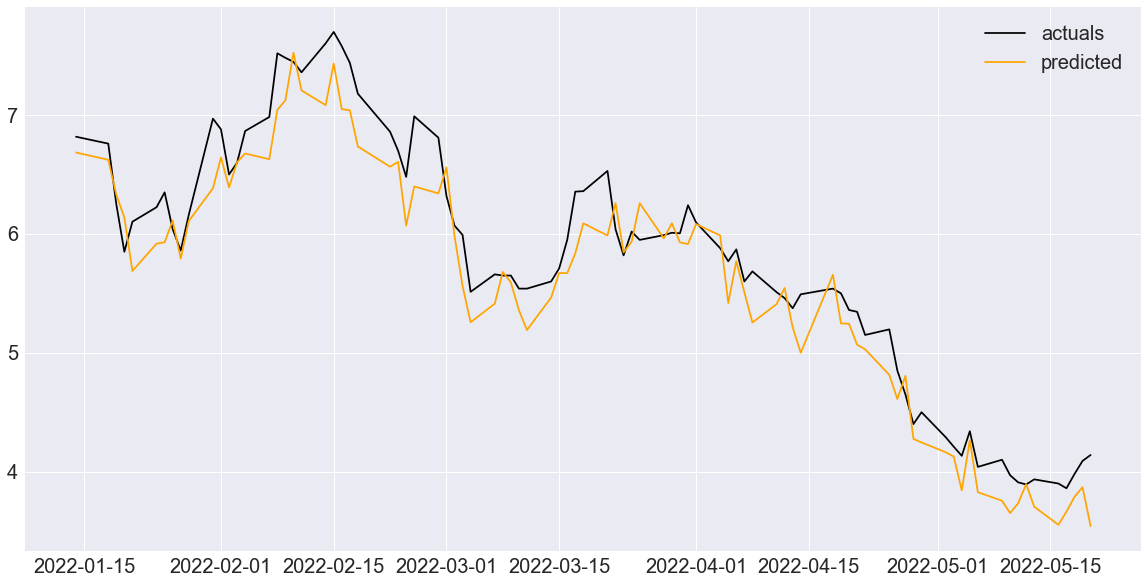

In [188]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test5['crlbf_next_close'], color='black')
ax.plot(y_test5['crlbf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CRLBF target), Cannabis ETFs, and DJIX

In [189]:
df_all_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs_dow.csv')
df_all_etfs_dow['Date'] = pd.to_datetime(df_all_etfs_dow['Date'])
df_all_etfs_dow = df_all_etfs_dow.set_index('Date')

In [190]:
df_isna6 = df_all_etfs_dow.isna()
df_isna6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [191]:
df_isna6 = df_isna6.add_suffix('_b')

In [192]:
df6 = df_all_etfs_dow.fillna(0)
df6.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [193]:
df6 = pd.concat([df6, df_isna6], axis=1)
df6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [194]:
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['year'] = df6.index.year
df6['quarter'] = (df6['month']-1)//3 + 1

In [195]:
cols = df6.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [196]:
df6 = df6[cols].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [197]:
df6 = df6[cut:].copy().copy()
df6

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-12-03     12    3  2018        4  34.500000  35.180000  32.360001   
2018-12-04     12    4  2018        4  32.860001  33.160000  31.219999   
2018-12-06     12    6  2018        4  28.790001  30.650000  28.100000   
2018-12-07     12    7  2018        4  32.389999  32.549999  30.799999   
2018-12-10     12   10  2018        4  31.459999  32.169998  30.209999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-12-03  33.330002    10851200       33.549999       31.450001 -0.219997   
2018-12-04  31.450001     6717200       33.330002       30.340000 -1.880001   
2018-12-06  30.340000    10718200       31.450001       31.400000 -1.110001   
2018-12-07  31.400000     6149600       30.340000       31.020000  1.060000   
2018-12-10  31.020000     4580200       31.400000       33.160000 -0.380000   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-12-03    -0.006557           33.152000           0.356001   
2018-12-04    -0.056406           33.102000          -0.050000   
2018-12-06    -0.035294           32.370000          -0.732000   
2018-12-07     0.034937           32.014000          -0.356000   
2018-12-10    -0.012102           31.508001          -0.506000   
...                 ...                 ...                ...   
2022-05-17     0.027923            5.578000           0.090000   
2022-05-18    -0.050934            5.700000           0.122000   
2022-05-19     0.050089            5.800000           0.100000   
2022-05-20    -0.059625            5.720000          -0.080000   
2022-05-23    -0.059783            5.612000          -0.108000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-12-03            32.954000              -0.188       5.300       5.520   
2018-12-04            32.822001              -0.132       5.152       5.165   
2018-12-06            32.640000              -0.182       5.071       5.145   
2018-12-07            32.406000              -0.234       5.194       5.420   
2018-12-10            32.152000              -0.254       5.022       5.338   
...                         ...                 ...         ...         ...   
2022-05-17             5.759000              -0.017       3.973       4.100   
2022-05-18             5.651000              -0.108       3.990       4.070   
2022-05-19             5.631000              -0.020       3.990       4.030   
2022-05-20             5.586000              -0.045       3.990       4.200   
2022-05-23             5.550000              -0.036       4.210       4.220   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [198]:
df6.drop(df6.tail(1).index, inplace=True)

In [199]:
n = int(len(df6) * 0.9)
n

785

In [200]:
train6 = df6[:n]
test6 = df6[n:]

In [201]:
print(len(train6))
print(len(test6))

785
88


In [202]:
X_train6 = train6.drop('crlbf_next_close', axis=1)
X_train6.head(3)

month  day  year  quarter   cgc_Open  cgc_High    cgc_Low  \
Date                                                                    
2018-12-03     12    3  2018        4  34.500000     35.18  32.360001   
2018-12-04     12    4  2018        4  32.860001     33.16  31.219999   
2018-12-06     12    6  2018        4  28.790001     30.65  28.100000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-12-03  33.330002    10851200       33.549999       31.450001 -0.219997   
2018-12-04  31.450001     6717200       33.330002       30.340000 -1.880001   
2018-12-06  30.340000    10718200       31.450001       31.400000 -1.110001   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-12-03    -0.006557              33.152           0.356001   
2018-12-04    -0.056406              33.102          -0.050000   
2018-12-06    -0.035294              32.370          -0.732000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-12-03            32.954000              -0.188       5.300       5.520   
2018-12-04            32.822001              -0.132       5.152       5.165   
2018-12-06            32.640000              -0.182       5.071       5.145   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-12-03      4.742        4.962      174800.0             0.000   
2018-12-04      4.186        4.340      269400.0             4.962   
2018-12-06      4.320        4.750      217100.0             4.340   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2018-12-03       0.000       0.000000                   0.0   
2018-12-04      -0.622      -0.125353                   0.0   
2018-12-06       0.410       0.094470                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-12-03                  0.0                    0.0                   0.0   
2018-12-04                  0.0                    0.0                   0.0   
2018-12-06                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-12-03       9.25     11.890      8.51       10.17   45161900.0   
2018-12-04      10.97     11.200     10.38       10.74   26371000.0   
2018-12-06       9.92     10.565      9.76       10.45   12016300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-12-03             9.15            10.74       1.02      0.111475   
2018-12-04            10.17            10.45       0.57      0.056047   
2018-12-06            10.74            12.72      -0.29     -0.027002   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-12-03                9.044               0.368                 8.733   
2018-12-04                9.534               0.490                 8.983   
2018-12-06                9.884               0.350                 9.208   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-12-03                0.161       5.487       6.500      4.550   
2018-12-04                0.250       4.666       4.705      3.883   
2018-12-06                0.225       4.079       5.478      4.048 

In [203]:
X_train6.shape

(785, 419)

In [204]:
y_train6 = train6['crlbf_next_close']
y_train6.head(3)

Date
2018-12-03    4.34
2018-12-04    4.75
2018-12-06    5.00
Name: crlbf_next_close, dtype: float64

In [205]:
y_train6.tail(3)

Date
2022-01-11    6.767
2022-01-12    6.880
2022-01-13    6.910
Name: crlbf_next_close, dtype: float64

In [206]:
X_test6 = test6.drop('crlbf_next_close', axis=1)
y_test6 = test6['crlbf_next_close']

In [207]:
X_test6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-01-14      1   14  2022        1      8.38     8.460    8.085       8.40   
2022-01-18      1   18  2022        1      8.22     8.303    7.760       7.78   
2022-01-19      1   19  2022        1      7.81     8.010    7.610       7.64   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-01-14     5799800            8.41            7.78     -0.01    -0.001189   
2022-01-18     7160200            8.40            7.64     -0.62    -0.073810   
2022-01-19     5854400            7.78            7.56     -0.14    -0.017995   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-01-14               8.718             -0.024                8.696   
2022-01-18               8.524             -0.194                8.544   
2022-01-19               8.230             -0.294                8.411   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-01-14              -0.033        6.80        6.98       6.61   
2022-01-18              -0.152        6.53        6.92       6.50   
2022-01-19              -0.133        6.90        6.90       6.44   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_diff  \
Date                                                                  
2022-01-14        6.910      418000.0             6.880       0.030   
2022-01-18        6.818      502100.0             6.910      -0.092   
2022-01-19        6.760      658100.0             6.818      -0.058   

            crlbf_%change  crlbf_5day_avg_close  crlbf_5day_avg_diff  \
Date                                                                   
2022-01-14       0.004360                6.7614               0.0760   
2022-01-18      -0.013314                6.8030               0.0416   
2022-01-19      -0.008507                6.8270               0.0240   

            crlbf_10day_avg_close  crlbf_10day_avg_diff  cron_Open  cron_High  \
Date                                                                            
2022-01-14                 6.6027                0.0240       3.88       3.94   
2022-01-18                 6.6095                0.0068       3.83       3.86   
2022-01-19                 6.6305                0.0210       3.70       3.74   

            cron_Low  cron_Close  cron_Volume  cron_prev_close  \
Date                                                             
2022-01-14     3.785        3.93    1915200.0             3.90   
2022-01-18     3.670        3.68    3009600.0             3.93   
2022-01-19     3.580        3.59    2487300.0             3.68   

            cron_next_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2022-01-14             3.68       0.03      0.007692                3.976   
2022-01-18             3.59      -0.25     -0.063613                3.920   
2022-01-19             3.57      -0.09     -0.024457                3.826   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2022-01-14               0.006                 3.976                0.001   
2022-01-18              -0.056                 3.924               -0.052   
2022-01-19              -0.094                 3.872               -0.052   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2022-01-14        8.22       8.270       8.00        8.230      342500.0   
2022-01-18        7.93       

In [208]:
X_test6.shape

(88, 419)

In [209]:
y_test6.tail(3)

Date
2022-05-18    3.98
2022-05-19    4.09
2022-05-20    4.14
Name: crlbf_next_close, dtype: float64

In [210]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

In [211]:
y_pred6[:5]

array([6.67553651, 6.58839605, 6.31382711, 6.13870826, 5.6615817 ])

In [212]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man6 = rmse_manual(y_test6, y_pred6)
print(rmse_man6)

0.27494170319435873


In [213]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man6 = mae_manual(y_test6, y_pred6)
print(mae_man6)

0.22787534124015274


In [214]:
y_train6 = pd.DataFrame(y_train6, columns=['crlbf_next_close'])
y_test6 = pd.DataFrame(y_test6, columns=['crlbf_next_close'])

In [215]:
y_test6['crlbf_pred_next_close'] = y_pred6

In [216]:
y_test6.tail()

crlbf_next_close  crlbf_pred_next_close
Date                                               
2022-05-16              3.90               3.612817
2022-05-17              3.86               3.609441
2022-05-18              3.98               3.759723
2022-05-19              4.09               3.878579
2022-05-20              4.14               3.620033

In [217]:
hyper_table.append(dict(stock='crlbf', 
                        version='All+ETFs+Dow',
                        model=model6, 
                        rmse=rmse_man6,
                        mae=mae_man6,
                        actual_price=y_test6['crlbf_next_close'][-1],
                        predicted_price=y_test6['crlbf_pred_next_close'][-1],
                        rows=df6.shape[0], 
                        train_rows=X_train6.shape[0],
                        test_rows=X_test6.shape[0],
                        columns=df6.shape[1]))

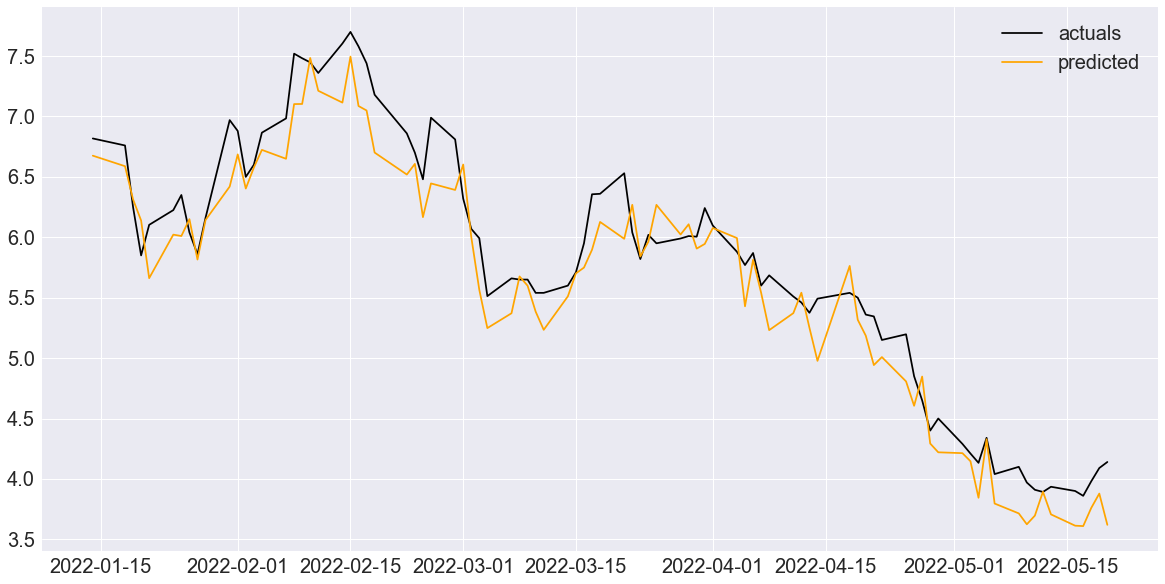

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test6['crlbf_next_close'], color='black')
ax.plot(y_test6['crlbf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [219]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table = hyper_table.sort_values('rmse', ascending=True)
hyper_table

stock       version               model      rmse       mae  actual_price  \
1  crlbf        1+ETFs  LinearRegression()  0.187848  0.149452          4.14   
2  crlbf    1+ETFs+Dow  LinearRegression()  0.198895  0.162744          4.14   
0  crlbf         1+Dow  LinearRegression()  0.215339  0.177527          4.14   
4  crlbf       All+Dow  LinearRegression()  0.246906  0.201210          4.14   
3  crlbf    All stocks  LinearRegression()  0.269273  0.222936          4.14   
6  crlbf  All+ETFs+Dow  LinearRegression()  0.274942  0.227875          4.14   
5  crlbf      All+ETFs  LinearRegression()  0.283461  0.235608          4.14   

   predicted_price  rows  train_rows  test_rows  columns  
1         3.864823   873         785         88      160  
2         3.921987   873         785         88      186  
0         4.274582   873         785         88       56  
4         3.763344   873         785         88      290  
3         3.666331   873         785         88      264  
6         3.620033   873         785         88      420  
5         3.541754   873         785         88      394

In [220]:
hyper_table_crlbf = hyper_table.head(1)
hyper_table_crlbf

stock version               model      rmse       mae  actual_price  \
1  crlbf  1+ETFs  LinearRegression()  0.187848  0.149452          4.14   

   predicted_price  rows  train_rows  test_rows  columns  
1         3.864823   873         785         88      160

In [221]:
hyper_table_crlbf.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/data from notebooks/hyper_table_crlbf.csv', index=True)

## Simulation - Sell

In [222]:
crlbf_sim = df1[n:]
crlbf_sim = crlbf_sim[['crlbf_Open', 'crlbf_Close']]
crlbf_sim.head()

crlbf_Open  crlbf_Close
Date                               
2022-01-14        6.80        6.910
2022-01-18        6.53        6.818
2022-01-19        6.90        6.760
2022-01-20        6.92        6.250
2022-01-21        6.13        5.850

In [223]:
crlbf_sim.shape

(88, 2)

In [224]:
crlbf_sim.tail()

crlbf_Open  crlbf_Close
Date                               
2022-05-16       4.190        3.935
2022-05-17       3.973        3.900
2022-05-18       3.990        3.860
2022-05-19       3.990        3.980
2022-05-20       3.990        4.090

In [225]:
crlbf_sim['crlbf_Pred_Close'] = y_pred1
crlbf_sim.head()

crlbf_Open  crlbf_Close  crlbf_Pred_Close
Date                                                 
2022-01-14        6.80        6.910          6.716965
2022-01-18        6.53        6.818          6.534840
2022-01-19        6.90        6.760          6.414543
2022-01-20        6.92        6.250          5.953085
2022-01-21        6.13        5.850          5.903589

In [226]:
crlbf_sim['Trade'] = crlbf_sim['crlbf_Pred_Close'] > crlbf_sim['crlbf_Open']
crlbf_sim.head()

crlbf_Open  crlbf_Close  crlbf_Pred_Close  Trade
Date                                                        
2022-01-14        6.80        6.910          6.716965  False
2022-01-18        6.53        6.818          6.534840   True
2022-01-19        6.90        6.760          6.414543  False
2022-01-20        6.92        6.250          5.953085  False
2022-01-21        6.13        5.850          5.903589  False

In [227]:
crlbf_sim = crlbf_sim[crlbf_sim['Trade']==True]
crlbf_sim.head()

crlbf_Open  crlbf_Close  crlbf_Pred_Close  Trade
Date                                                        
2022-01-18        6.53        6.818          6.534840   True
2022-01-24        5.85        6.103          5.883520   True
2022-01-28        6.00        5.860          6.134044   True
2022-01-31        5.75        6.161          6.593745   True
2022-02-01        6.36        6.970          6.619033   True

In [228]:
crlbf_sim['Gains'] = (crlbf_sim['crlbf_Close'] - crlbf_sim['crlbf_Open'])*100
crlbf_sim.head()

crlbf_Open  crlbf_Close  crlbf_Pred_Close  Trade  Gains
Date                                                               
2022-01-18        6.53        6.818          6.534840   True   28.8
2022-01-24        5.85        6.103          5.883520   True   25.3
2022-01-28        6.00        5.860          6.134044   True  -14.0
2022-01-31        5.75        6.161          6.593745   True   41.1
2022-02-01        6.36        6.970          6.619033   True   61.0

In [229]:
total_gains = crlbf_sim['Gains'].sum()
print(round(total_gains, 2))

725.2
